In [31]:
# --- Del 1: Importer og definer verdier ---
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive, FloatSlider, Dropdown, fixed, HBox, VBox, Output, Label

# Definer verdier for naturkvalitet basert på tabellene
naturkvalitet_øko = [
    ('Verneområder/utvalgte naturtyper', 5.0),
    ('Økologiske funksjonsområder for prioriterte arter', 5.0),
    ('Naturtyper - Svært høy lokalitetskvalitet', 4.0),
    ('Naturtyper - Høy lokalitetskvalitet', 3.0),
    ('Naturtyper - Moderat lokalitetskvalitet', 2.2),
    ('Naturtyper - Lav lokalitetskvalitet', 2.0),
    ('Naturtyper - Svært lav lokalitetskvalitet', 1.0),
    ('Øvrig natur - Høy kvalitet', 2.0),
    ('Øvrig natur - Moderat kvalitet', 1.0),
    ('Øvrig natur - Lav kvalitet', 0.5),
    ('Sterkt endrede arealer', 0.0)
]

naturkvalitet_funk = [
    ('Villrein - Nasjonalt villreinområde', 4.0),
    ('Villrein - Fastsatte randområder', 3.0),
    ('Villrein - Fastsatte bygdenære områder', 2.2),
    ('Funksjonsområder - Prioritert art, fugl og pattedyr', 5.0),
    ('Funksjonsområder - Svært høy kvalitet', 4.0),
    ('Funksjonsområder - Høy kvalitet', 3.0),
    ('Funksjonsområder - Moderat kvalitet', 2.2),
    ('Funksjonsområder - Lav kvalitet', 2.0),
    ('Funksjonsområder - Svært lav kvalitet', 1.0)
]

naturkvalitet_vann = [
    ('Svært høy kvalitet', 4.0),
    ('Høy kvalitet', 3.0),
    ('Moderat kvalitet', 2.2),
    ('Lav kvalitet', 2.0),
    ('Svært lav kvalitet', 1.0)
]

# Definer verdier for forvaltningsinteresse
forvaltningsinteresse_options = [
    ('Verneområder', 5.0),
    ('Utvalgte naturtyper', 5.0),
    ('Økologiske funksjonsområder for prioriterte arter', 5.0),
    ('CR og EN naturtype', 4.0),
    ('VU naturtype', 3.0),
    ('NT naturtype/Sentral økosystem funksjon/Dårlig kartlagt', 2.0),
    ('Øvrig natur og Sterkt endret areal', 1.0),
    ('Prioritert art (fugl og pattedyr)', 5.0),
    ('CR og EN art', 4.0),
    ('VU art, andre spesielt hensynskrevende arter', 3.0),
    ('NT art og ansvarsarter', 2.0),
    ('Fredede og prioriterte arter, EN og CR arter', 4.0)
]

# Definer verdier for påvirkning
påvirkning_options = [
    ('Ingen påvirkning', 0.0),
    ('Ubetydelig påvirkning', 0.1),
    ('Noe forringet', 0.2),
    ('Forringet', 0.4),
    ('Sterkt forringet', 0.6),
    ('Svært sterkt forringet', 0.8)
]

# Definer verdier for risikofaktorer
risiko_avstand_options = [
    ('Samme sted (0 km)', 1.0),
    ('Nærområdet (0-3 km)', 0.9),
    ('Samme kommune (3-10 km)', 0.8),
    ('Samme region (10-30 km)', 0.7),
    ('Utenfor regionen (>30 km)', 0.6)
]

risiko_tid_options = [
    ('Ingen tidsforsinkelse', 1.0),
    ('Kort tidsforsinkelse (0-5 år)', 0.9),
    ('Middels tidsforsinkelse (5-15 år)', 0.8),
    ('Lang tidsforsinkelse (15-50 år)', 0.7),
    ('Svært lang tidsforsinkelse (>50 år)', 0.6)
]

risiko_vanskelighet_options = [
    ('Svært enkel', 1.0),
    ('Enkel', 0.9),
    ('Middels', 0.8),
    ('Vanskelig', 0.7),
    ('Svært vanskelig', 0.6)
]


# --- Del 2: Beregningsfunksjoner ---
def beregn_naturpoeng_før(utstrekning, naturkvalitet, forvaltningsinteresse):
    return utstrekning * naturkvalitet * forvaltningsinteresse

def beregn_naturpoeng_tapt(tapte_utstrekning, rest_utstrekning, naturkvalitet, 
                          forvaltningsinteresse, påvirkning):
    direkte_tap = tapte_utstrekning * naturkvalitet * forvaltningsinteresse
    indirekte_tap = (rest_utstrekning * naturkvalitet * forvaltningsinteresse) * påvirkning
    return direkte_tap + indirekte_tap

def beregn_naturpoeng_skapt(komp_utstrekning, komp_naturkvalitet, komp_forvaltningsinteresse,
                           risiko_avstand, risiko_tid, risiko_vanskelighet,
                           er_offsite=False, original_areal=None):
    skapte_poeng = (komp_utstrekning * komp_naturkvalitet * komp_forvaltningsinteresse * 
                    risiko_avstand * risiko_tid * risiko_vanskelighet)
    
    if er_offsite and original_areal is not None:
        return skapte_poeng - original_areal
    
    return skapte_poeng

# Funksjon for å oppdatere naturkvalitet basert på delregnskap
def oppdater_naturkvalitet_options(delregnskap):
    if delregnskap == 'eco':
        return naturkvalitet_øko
    elif delregnskap == 'funk':
        return naturkvalitet_funk
    else:  # vann
        return naturkvalitet_vann

# --- Del 3: Widget-oppsett ---
# Opprett widgets for opprinnelig område
delregnskap_valg = Dropdown(
    options=[
        ('I: Økosystemareal', 'eco'),
        ('II: Økologiske funksjonsområder', 'funk'),
        ('III: Vannforekomster', 'vann')
    ],
    value='eco',
    description='Delregnskap:'
)

utstrekning_slider = FloatSlider(
    value=50,
    min=10,
    max=200,
    step=5,
    description='Utstrekning:',
    tooltip='Areal i dekar (I, II) eller lengde i meter (III)',
    continuous_update=False
)

naturkvalitet_dropdown = Dropdown(
    options=naturkvalitet_øko,
    value=4.0,
    description='Naturkvalitet:'
)

forvaltningsinteresse_dropdown = Dropdown(
    options=forvaltningsinteresse_options,
    value=3.0,
    description='Forvaltning:'
)

tapte_utstrekning_slider = FloatSlider(
    value=15,
    min=0,
    max=200,
    step=5,
    description='Tapt direkte:',
    tooltip='Utstrekning som bygges ned/ødelegges direkte',
    continuous_update=False
)

påvirkning_dropdown = Dropdown(
    options=påvirkning_options,
    value=0.2,
    description='Påvirkning:'
)

# Widgets for kompensasjonsområdet
komp_utstrekning_slider = FloatSlider(
    value=30,
    min=0,
    max=200,
    step=5,
    description='Kompensasjon:',
    tooltip='Utstrekning for kompensasjon/restaurering',
    continuous_update=False
)

# Nye widgets for separate kompensasjonsverdier
komp_naturkvalitet_dropdown = Dropdown(
    options=naturkvalitet_øko,
    value=3.0,  # Standard er litt lavere enn området
    description='Komp. kvalitet:'
)

komp_forvaltningsinteresse_dropdown = Dropdown(
    options=forvaltningsinteresse_options,
    value=2.0,  # Standard er litt lavere enn området
    description='Komp. forvaltning:'
)

kompensasjon_type_dropdown = Dropdown(
    options=[
        ('On-site kompensasjon', 'onsite'),
        ('Off-site kompensasjon', 'offsite')
    ],
    value='onsite',
    description='Komp.type:'
)

original_areal_slider = FloatSlider(
    value=0,
    min=0,
    max=200,
    step=5,
    description='Original areal:',
    tooltip='Naturpoeng i areal som tas i bruk for off-site kompensasjon',
    continuous_update=False,
    disabled=True
)

risiko_avstand_dropdown = Dropdown(
    options=risiko_avstand_options,
    value=0.9,
    description='Avstand:'
)

risiko_tid_dropdown = Dropdown(
    options=risiko_tid_options,
    value=0.9,
    description='Tidsperspektiv:'
)

risiko_vanskelighet_dropdown = Dropdown(
    options=risiko_vanskelighet_options,
    value=0.8,
    description='Vanskelighet:'
)

output_widget = Output()

# --- Del 4: Oppdateringsfunksjoner ---
# Funksjon for å håndtere aktivering/deaktivering av original_areal_slider
def on_kompensasjon_type_change(change):
    if change['new'] == 'offsite':
        original_areal_slider.disabled = False
    else:
        original_areal_slider.disabled = True
        original_areal_slider.value = 0

# Funksjon for å oppdatere naturkvalitet når delregnskap endres
def on_delregnskap_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        nye_options = oppdater_naturkvalitet_options(change['new'])
        naturkvalitet_dropdown.options = nye_options
        naturkvalitet_dropdown.value = nye_options[0][1]
        
        # Oppdater også kompensasjonens naturkvalitet med samme alternativ
        komp_naturkvalitet_dropdown.options = nye_options
        komp_naturkvalitet_dropdown.value = nye_options[0][1]

# Koble funksjonene til widgets
kompensasjon_type_dropdown.observe(on_kompensasjon_type_change, names='value')
delregnskap_valg.observe(on_delregnskap_change, names='value')

# Funksjon for å oppdatere beregningene og visualiseringen
# Modifisert funksjon for å oppdatere beregningene og visualiseringen med oppdelt tapskolonne
# Erstatt den eksisterende update_calculation-funksjonen med denne

def update_calculation(delregnskap, utstrekning, naturkvalitet, forvaltningsinteresse, 
                tapte_utstrekning, påvirkning, komp_utstrekning, 
                komp_naturkvalitet, komp_forvaltningsinteresse,
                risiko_avstand, risiko_tid, risiko_vanskelighet,
                kompensasjon_type, original_areal):
    with output_widget:
        output_widget.clear_output(wait=True)
    
        # Kontroller at tapte_utstrekning ikke overstiger utstrekning
        if tapte_utstrekning > utstrekning:
            tapte_utstrekning = utstrekning
        
        # Beregn resterende utstrekning
        rest_utstrekning = utstrekning - tapte_utstrekning
        
        # Beregn Naturpoeng
        naturpoeng_før = beregn_naturpoeng_før(utstrekning, naturkvalitet, forvaltningsinteresse)
        
        # Splitt tap i direkte og indirekte komponenter
        naturpoeng_direkte_tap = tapte_utstrekning * naturkvalitet * forvaltningsinteresse
        naturpoeng_indirekte_tap = rest_utstrekning * naturkvalitet * forvaltningsinteresse * påvirkning
        naturpoeng_tapt = naturpoeng_direkte_tap + naturpoeng_indirekte_tap
        
        # Beregn skapte naturpoeng med off-site støtte
        er_offsite = kompensasjon_type == 'offsite'
        original_areal_verdi = original_areal if er_offsite else None
        
        naturpoeng_skapt = beregn_naturpoeng_skapt(
            komp_utstrekning, komp_naturkvalitet, komp_forvaltningsinteresse,
            risiko_avstand, risiko_tid, risiko_vanskelighet,
            er_offsite=er_offsite,
            original_areal=original_areal_verdi
        )
        
        naturpoeng_etter = naturpoeng_før - naturpoeng_tapt + naturpoeng_skapt
        netto_endring = naturpoeng_etter - naturpoeng_før
        prosent_endring = (netto_endring / naturpoeng_før) * 100 if naturpoeng_før > 0 else 0
        
        # Vis resultatene
        målenheter = "dekar" if delregnskap in ["eco", "funk"] else "meter"
        naturtype_tekst = {
            'eco': 'naturtype',
            'funk': 'funksjonsområde',
            'vann': 'vannforekomst'
        }
        
        display(Markdown(f"""
        ### Resultater for Delregnskap {delregnskap_valg.label}
        
        #### Inndata opprinnelig område:
        - Utstrekning: {utstrekning} {målenheter} {naturtype_tekst[delregnskap]}
        - Naturkvalitet: {naturkvalitet}
        - Forvaltningsinteresse: {forvaltningsinteresse}
        - Tapt direkte: {tapte_utstrekning} {målenheter}
        - Påvirkning på rest: {påvirkning}
        
        #### Inndata kompensasjonsområde:
        - Kompensasjon: {komp_utstrekning} {målenheter}
        - Naturkvalitet: {komp_naturkvalitet}
        - Forvaltningsinteresse: {komp_forvaltningsinteresse}
        - Kompensasjonstype: {'On-site kompensasjon' if kompensasjon_type == 'onsite' else 'Off-site kompensasjon'}
        {f'- Original areal naturpoeng: {original_areal}' if er_offsite else ''}
        - Avstand: {risiko_avstand}
        - Tidsforsinkelse: {risiko_tid}
        - Vanskelighet: {risiko_vanskelighet}
        
        #### Beregninger:
        - Naturpoeng før: {naturpoeng_før:.1f}
        - Tapte Naturpoeng: {naturpoeng_tapt:.1f}
          - Direkte tap: {naturpoeng_direkte_tap:.1f}
          - Indirekte tap: {naturpoeng_indirekte_tap:.1f}
        - Skapte Naturpoeng: {naturpoeng_skapt:.1f}
        
        #### Resultat:
        - Naturpoeng etter: {naturpoeng_etter:.1f}
        - Netto endring: {netto_endring:.1f} Naturpoeng ({prosent_endring:.1f}%)
        """))
        
        # Modifisert visualisering med oppdelt tapskolonne
        plt.figure(figsize=(12, 6))
        
        # Definér posisjoner for søylene
        x_pos = [0, 1, 2, 3]
        
        # Før inngrep søyle
        plt.bar(x_pos[0], naturpoeng_før, color='green', label='Før inngrep')
        
        # Todelt tapsøyle: Direkte og indirekte
        plt.bar(x_pos[1], naturpoeng_direkte_tap, color='darkred', label='Direkte tap')
        plt.bar(x_pos[1], naturpoeng_indirekte_tap, bottom=naturpoeng_direkte_tap, 
                color='indianred', label='Indirekte tap')
        
        # Skapte naturpoeng søyle
        plt.bar(x_pos[2], naturpoeng_skapt, color='blue', label='Skapt')
        
        # Etter inngrep søyle
        plt.bar(x_pos[3], naturpoeng_etter, color='purple', label='Etter inngrep')
        
        # Tilføy tekstetiketter over hver søyle med verdier
        plt.text(x_pos[0], naturpoeng_før, f'{naturpoeng_før:.1f}', ha='center', va='bottom')
        
        # For tapssøylen, vis både totalsum og komponentene
        plt.text(x_pos[1], naturpoeng_tapt, f'{naturpoeng_tapt:.1f}', ha='center', va='bottom')
        plt.text(x_pos[1], naturpoeng_direkte_tap/2, f'{naturpoeng_direkte_tap:.1f}', 
                ha='center', va='center', color='white', fontweight='bold')
        
        if naturpoeng_indirekte_tap > 0:
            y_pos = naturpoeng_direkte_tap + naturpoeng_indirekte_tap/2
            plt.text(x_pos[1], y_pos, f'{naturpoeng_indirekte_tap:.1f}',
                    ha='center', va='center', color='white', fontweight='bold')
        
        plt.text(x_pos[2], naturpoeng_skapt, f'{naturpoeng_skapt:.1f}', ha='center', va='bottom')
        plt.text(x_pos[3], naturpoeng_etter, f'{naturpoeng_etter:.1f}', ha='center', va='bottom')
        
        # Sett aksetitler og diagram-tittel
        plt.xticks(x_pos, ['Før inngrep', 'Tapt', 'Skapt', 'Etter inngrep'])
        plt.ylabel('Naturpoeng')
        plt.title(f'Naturregnskap for Delregnskap {delregnskap_valg.label}')
        
        # Legg til legend
        plt.legend(loc='upper right')
        
        plt.show()

# Funksjon for å håndtere oppdateringer
def on_value_change(change):
    update_calculation(
        delregnskap_valg.value,
        utstrekning_slider.value,
        naturkvalitet_dropdown.value,
        forvaltningsinteresse_dropdown.value,
        tapte_utstrekning_slider.value,
        påvirkning_dropdown.value,
        komp_utstrekning_slider.value,
        komp_naturkvalitet_dropdown.value,
        komp_forvaltningsinteresse_dropdown.value,
        risiko_avstand_dropdown.value,
        risiko_tid_dropdown.value,
        risiko_vanskelighet_dropdown.value,
        kompensasjon_type_dropdown.value,
        original_areal_slider.value
    )

# Koble alle widgets til oppdateringsfunksjonen
for widget in [delregnskap_valg, utstrekning_slider, naturkvalitet_dropdown,
              forvaltningsinteresse_dropdown, tapte_utstrekning_slider,
              påvirkning_dropdown, komp_utstrekning_slider,
              komp_naturkvalitet_dropdown, komp_forvaltningsinteresse_dropdown,
              risiko_avstand_dropdown, risiko_tid_dropdown,
              risiko_vanskelighet_dropdown, kompensasjon_type_dropdown,
              original_areal_slider]:
    widget.observe(on_value_change, names='value')

# --- Del 5: Vis grensesnittet ---
# Legg til overskrifter for å skille mellom de to områdene
område_header = widgets.HTML("<h3 style='margin-top:0'>Opprinnelig område</h3>")
komp_header = widgets.HTML("<h3 style='margin-top:0'>Kompensasjonsområde</h3>")

# Organiser widgetene i to kolonner
venstre_kolonne = VBox([
    område_header,
    delregnskap_valg,
    utstrekning_slider,
    naturkvalitet_dropdown,
    forvaltningsinteresse_dropdown,
    tapte_utstrekning_slider,
    påvirkning_dropdown
])

høyre_kolonne = VBox([
    komp_header,
    komp_utstrekning_slider,
    komp_naturkvalitet_dropdown,
    komp_forvaltningsinteresse_dropdown,
    kompensasjon_type_dropdown,
    original_areal_slider,
    risiko_avstand_dropdown,
    risiko_tid_dropdown,
    risiko_vanskelighet_dropdown
])

# Vis widgetene og output
display(Markdown("## Interaktiv beregning av Naturpoeng"))
display(Markdown("""
Bruk kontrollene nedenfor for å utforske hvordan ulike parametre påvirker Naturpoeng-beregningen for et valgt delregnskap.
Nå kan du spesifisere separate verdier for naturkvalitet og forvaltningsinteresse for kompensasjonstiltakene.
"""))

display(HBox([venstre_kolonne, høyre_kolonne]))
display(output_widget)

# Kjør første beregning
on_value_change({'new': None})

## Interaktiv beregning av Naturpoeng


Bruk kontrollene nedenfor for å utforske hvordan ulike parametre påvirker Naturpoeng-beregningen for et valgt delregnskap.
Nå kan du spesifisere separate verdier for naturkvalitet og forvaltningsinteresse for kompensasjonstiltakene.


Output()

In [30]:
# LaTeX-formler med underbrace-notasjon som i eksempelbildet
# Denne koden må plasseres i samme notebook som hovedkoden

def vis_formler_med_underbrace():
    from IPython.display import display, Markdown
    
    try:
        # Hent verdiene fra hovedkoden
        utstrekning = utstrekning_slider.value
        naturkvalitet = naturkvalitet_dropdown.value
        forvaltning = forvaltningsinteresse_dropdown.value
        tapte_utstrekning = tapte_utstrekning_slider.value
        påvirkning = påvirkning_dropdown.value
        rest_utstrekning = utstrekning - tapte_utstrekning
        
        komp_utstrekning = komp_utstrekning_slider.value
        komp_naturkvalitet = komp_naturkvalitet_dropdown.value
        komp_forvaltning = komp_forvaltningsinteresse_dropdown.value
        risiko_avstand = risiko_avstand_dropdown.value
        risiko_tid = risiko_tid_dropdown.value
        risiko_vanskelighet = risiko_vanskelighet_dropdown.value
        er_offsite = kompensasjon_type_dropdown.value == 'offsite'
        original_areal = original_areal_slider.value if er_offsite else 0
        
        # Beregn alle verdier
        np_før = utstrekning * naturkvalitet * forvaltning
        np_direkte_tap = tapte_utstrekning * naturkvalitet * forvaltning
        np_indirekte_tap = rest_utstrekning * naturkvalitet * forvaltning * påvirkning
        np_tapt = np_direkte_tap + np_indirekte_tap
        
        np_skapt_før_fratrekk = komp_utstrekning * komp_naturkvalitet * komp_forvaltning * risiko_avstand * risiko_tid * risiko_vanskelighet
        np_skapt = np_skapt_før_fratrekk - original_areal if er_offsite else np_skapt_før_fratrekk
        
        np_etter = np_før - np_tapt + np_skapt
        delta_np = np_etter - np_før
        prosent_endring = (delta_np / np_før * 100) if np_før > 0 else 0
        
        # Få enheter
        delregnskap = delregnskap_valg.value
        enheter = "dekar" if delregnskap in ["eco", "funk"] else "meter"
        
        # Formatter alle verdier med én desimal
        def f(x):
            return "{:.1f}".format(x)
        
        # Lag brace-notasjon for opprinnelig område
        orig_formel = "$"
        orig_formel += "\\underbrace{" + f(utstrekning) + "\\text{ " + enheter + "}}_{\\text{Utstrekning}} \\times "
        orig_formel += "\\underbrace{" + f(naturkvalitet) + "}_{\\text{Naturkvalitet}} \\times "
        orig_formel += "\\underbrace{" + f(forvaltning) + "}_{\\text{Forvaltningsinteresse}}"
        orig_formel += " = " + f(np_før) + "\\text{ NP}$"
        
        # Lag brace-notasjon for tapte naturpoeng
        tapt_formel = "$"
        tapt_formel += "\\underbrace{" + f(tapte_utstrekning) + "\\text{ " + enheter + "}}_{\\text{Tapt utstrekning}} \\times "
        tapt_formel += "\\underbrace{" + f(naturkvalitet) + "}_{\\text{Naturkvalitet}} \\times "
        tapt_formel += "\\underbrace{" + f(forvaltning) + "}_{\\text{Forvaltningsinteresse}}"
        tapt_formel += " = " + f(np_direkte_tap) + "\\text{ NP}$"
        
        # Lag brace-notasjon for indirekte tapte naturpoeng
        indirekte_formel = "$"
        indirekte_formel += "\\underbrace{" + f(rest_utstrekning) + "\\text{ " + enheter + "}}_{\\text{Rest utstrekning}} \\times "
        indirekte_formel += "\\underbrace{" + f(naturkvalitet) + "}_{\\text{Naturkvalitet}} \\times "
        indirekte_formel += "\\underbrace{" + f(forvaltning) + "}_{\\text{Forvaltningsinteresse}} \\times "
        indirekte_formel += "\\underbrace{" + f(påvirkning) + "}_{\\text{Påvirkning}}"
        indirekte_formel += " = " + f(np_indirekte_tap) + "\\text{ NP}$"
        
        # Lag brace-notasjon for kompensasjon (med små justeringer avhengig av type)
        komp_formel = "$"
        komp_formel += "\\underbrace{" + f(komp_utstrekning) + "\\text{ " + enheter + "}}_{\\text{Komp. utstrekning}} \\times "
        komp_formel += "\\underbrace{" + f(komp_naturkvalitet) + "}_{\\text{Komp. naturkvalitet}} \\times "
        komp_formel += "\\underbrace{" + f(komp_forvaltning) + "}_{\\text{Komp. forvaltning}} \\times "
        komp_formel += "\\underbrace{" + f(risiko_avstand) + "}_{\\text{Risiko avstand}} \\times "
        komp_formel += "\\underbrace{" + f(risiko_tid) + "}_{\\text{Risiko tid}} \\times "
        komp_formel += "\\underbrace{" + f(risiko_vanskelighet) + "}_{\\text{Risiko vanskelighet}}"
        
        # Legg til original areal fratrekk hvis det er off-site
        if er_offsite and original_areal > 0:
            komp_formel += " - \\underbrace{" + f(original_areal) + "}_{\\text{Original areal}}"
        
        komp_formel += " = " + f(np_skapt) + "\\text{ NP}$"
        
        # Bygg LaTeX-koden for full visning
        latex_kode = "## Naturpoeng-beregninger med underbrace-notasjon\n\n"
        
        # 1. Naturpoeng før inngrep
        latex_kode += "### 1. Naturpoeng før inngrep\n"
        latex_kode += orig_formel + "\n\n"
        
        # 2. Tapte Naturpoeng
        latex_kode += "### 2. Tapte Naturpoeng\n\n"
        
        # Direkte tap
        latex_kode += "**Direkte tap:**\n"
        latex_kode += tapt_formel + "\n\n"
        
        # Indirekte tap
        latex_kode += "**Indirekte tap:**\n"
        latex_kode += indirekte_formel + "\n\n"
        
        # Totalt tap
        latex_kode += "**Totalt tap:**\n"
        latex_kode += "$NP_{tapt} = " + f(np_direkte_tap) + " + " + f(np_indirekte_tap) + " = " + f(np_tapt) + "\\text{ NP}$\n\n"
        
        # 3. Skapte Naturpoeng
        latex_kode += "### 3. Skapte Naturpoeng\n"
        
        # Legg til riktig formel basert på om det er offsite eller onsite
        if er_offsite:
            latex_kode += "**For off-site kompensasjon:**\n"
        else:
            latex_kode += "**For on-site kompensasjon:**\n"
        
        latex_kode += komp_formel + "\n\n"
        
        # 4. Netto Naturpoeng
        latex_kode += "### 4. Netto Naturpoeng etter inngrep og kompensasjon\n"
        latex_kode += "$NP_{etter} = " + f(np_før) + " - " + f(np_tapt) + " + " + f(np_skapt) + " = " + f(np_etter) + "\\text{ NP}$\n\n"
        
        # 5. Netto endring
        latex_kode += "### 5. Netto endring i Naturpoeng\n"
        latex_kode += "$\\Delta NP = " + f(np_etter) + " - " + f(np_før) + " = " + f(delta_np) + "\\text{ NP}$\n\n"
        
        # 6. Prosentvis endring
        latex_kode += "### 6. Prosentvis endring\n"
        latex_kode += "$\\Delta NP\\% = \\frac{" + f(delta_np) + "}{" + f(np_før) + "} \\times 100\\% = " + f(prosent_endring) + "\\%$\n"
        
        display(Markdown(latex_kode))
        
    except NameError as e:
        display(Markdown("""
        ## Feil: Manglende verdier
        
        Det ser ut til at noen av variablene fra hovedkoden ikke er tilgjengelige. 
        Sørg for at denne cellen kjøres etter at hovedkoden er kjørt.
        
        Feilmelding: """ + str(e) + """
        """))

# Kjør funksjonen for å vise formlene
vis_formler_med_underbrace()

## Naturpoeng-beregninger med underbrace-notasjon

### 1. Naturpoeng før inngrep
$\underbrace{50.0\text{ dekar}}_{\text{Utstrekning}} \times \underbrace{4.0}_{\text{Naturkvalitet}} \times \underbrace{3.0}_{\text{Forvaltningsinteresse}} = 600.0\text{ NP}$

### 2. Tapte Naturpoeng

**Direkte tap:**
$\underbrace{15.0\text{ dekar}}_{\text{Tapt utstrekning}} \times \underbrace{4.0}_{\text{Naturkvalitet}} \times \underbrace{3.0}_{\text{Forvaltningsinteresse}} = 180.0\text{ NP}$

**Indirekte tap:**
$\underbrace{35.0\text{ dekar}}_{\text{Rest utstrekning}} \times \underbrace{4.0}_{\text{Naturkvalitet}} \times \underbrace{3.0}_{\text{Forvaltningsinteresse}} \times \underbrace{0.2}_{\text{Påvirkning}} = 84.0\text{ NP}$

**Totalt tap:**
$NP_{tapt} = 180.0 + 84.0 = 264.0\text{ NP}$

### 3. Skapte Naturpoeng
**For on-site kompensasjon:**
$\underbrace{30.0\text{ dekar}}_{\text{Komp. utstrekning}} \times \underbrace{3.0}_{\text{Komp. naturkvalitet}} \times \underbrace{2.0}_{\text{Komp. forvaltning}} \times \underbrace{0.9}_{\text{Risiko avstand}} \times \underbrace{0.9}_{\text{Risiko tid}} \times \underbrace{0.8}_{\text{Risiko vanskelighet}} = 116.6\text{ NP}$

### 4. Netto Naturpoeng etter inngrep og kompensasjon
$NP_{etter} = 600.0 - 264.0 + 116.6 = 452.6\text{ NP}$

### 5. Netto endring i Naturpoeng
$\Delta NP = 452.6 - 600.0 = -147.4\text{ NP}$

### 6. Prosentvis endring
$\Delta NP\% = \frac{-147.4}{600.0} \times 100\% = -24.6\%$



    ## Sensitivitetsanalyse for Naturpoengberegningen
    
    ### Basisscenario (standardverdier)
    - Utstrekning: 50.0 dekar
    - Naturkvalitet: 4.0
    - Forvaltningsinteresse: 3.0
    - Tapt direkte: 15.0 dekar
    - Påvirkning: 0.2
    - Kompensasjonsutstrekning: 30.0 dekar
    - Kompensasjonsnaturkvalitet: 3.0
    - Kompensasjonsforvaltningsinteresse: 2.0
    - Risiko avstand: 0.9
    - Risiko tid: 0.9
    - Risiko vanskelighet: 0.8
    
    **Resultat for basisscenario:**
    - Naturpoeng før: 600.0
    - Tapte naturpoeng: 264.0
    - Skapte naturpoeng: 116.6
    - Naturpoeng etter: 452.6
    - Netto endring: -147.4 (-24.6%)
    

### Enpunkts sensitivitetsanalyse - Betydning av hver faktor

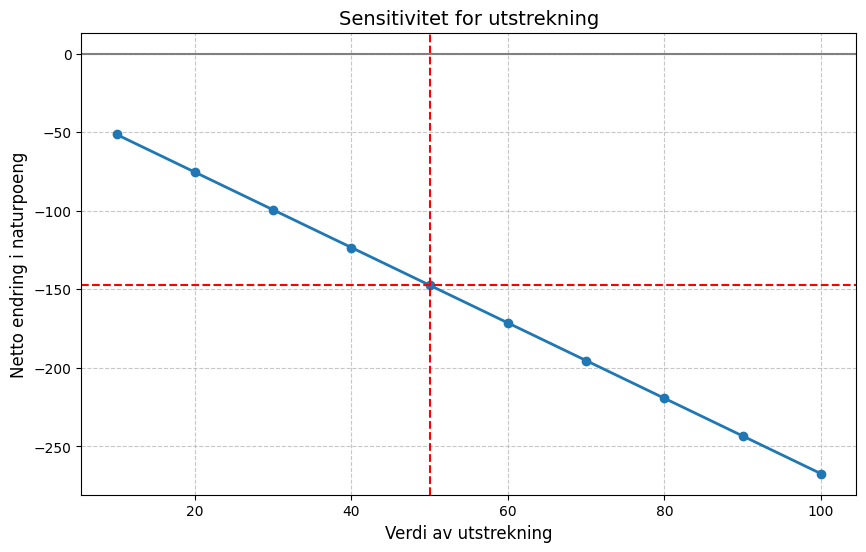

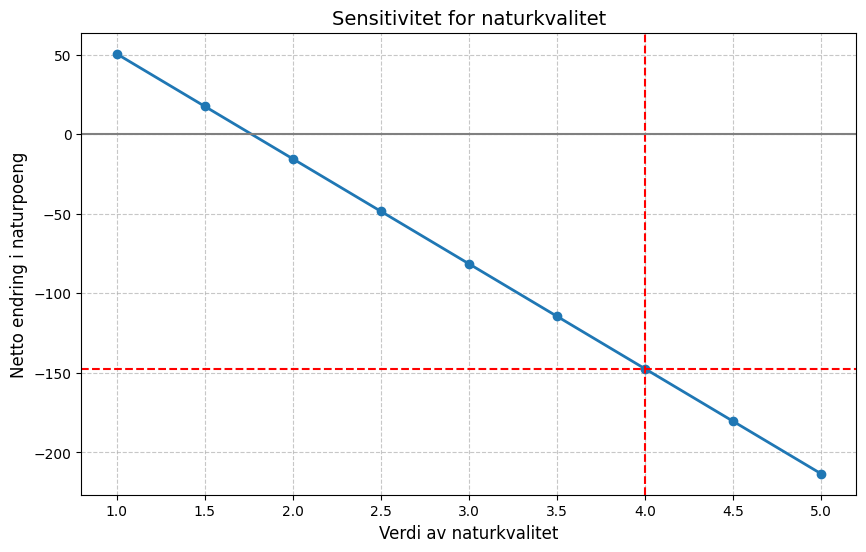

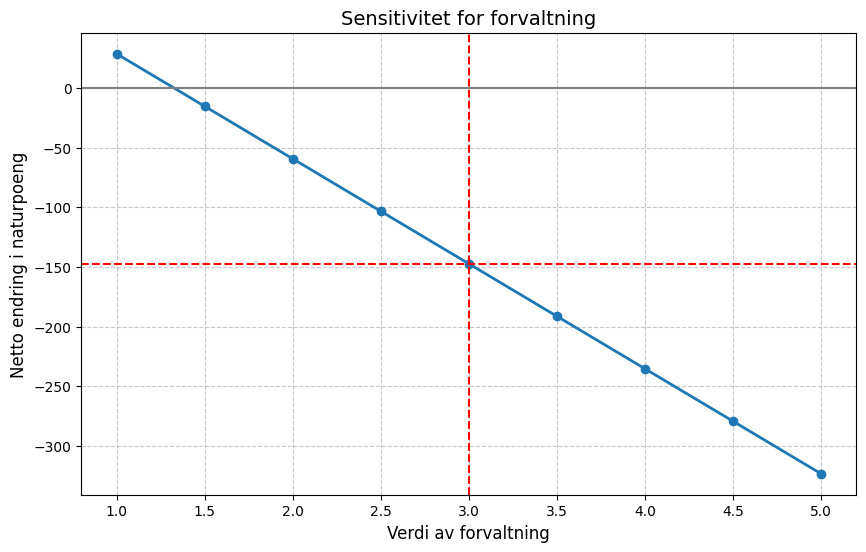

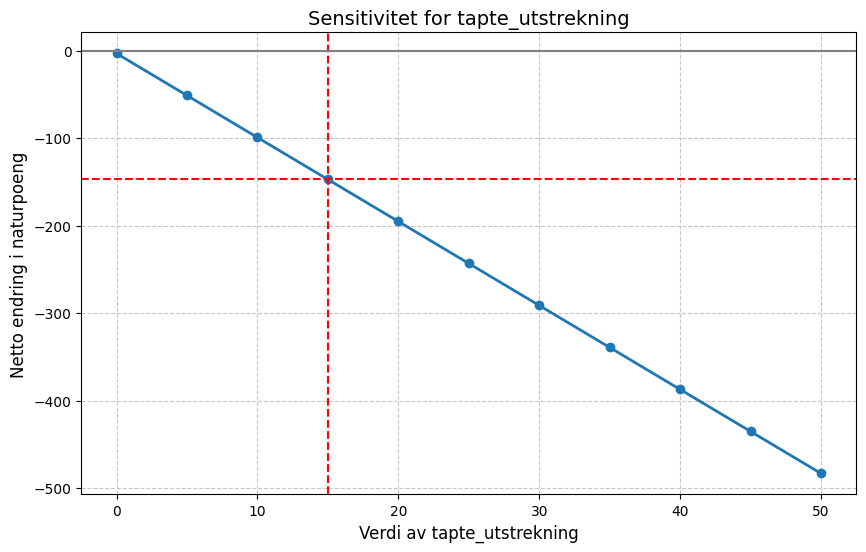

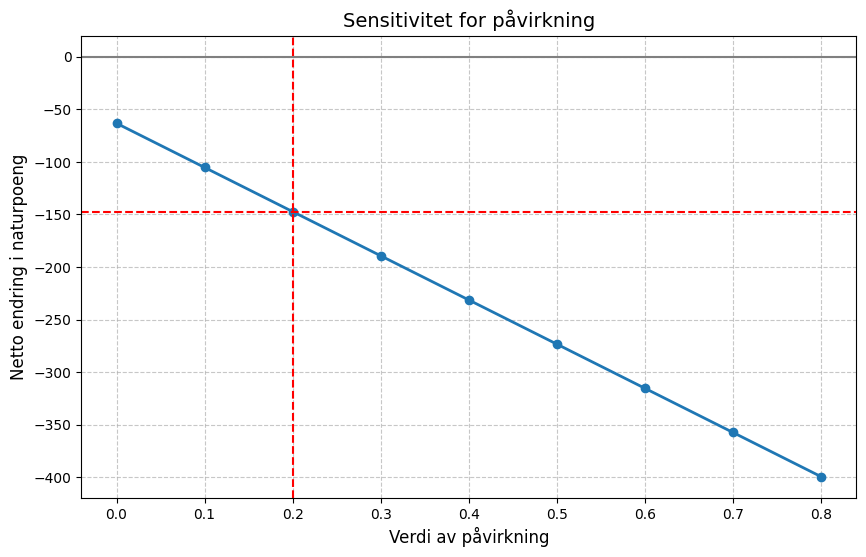

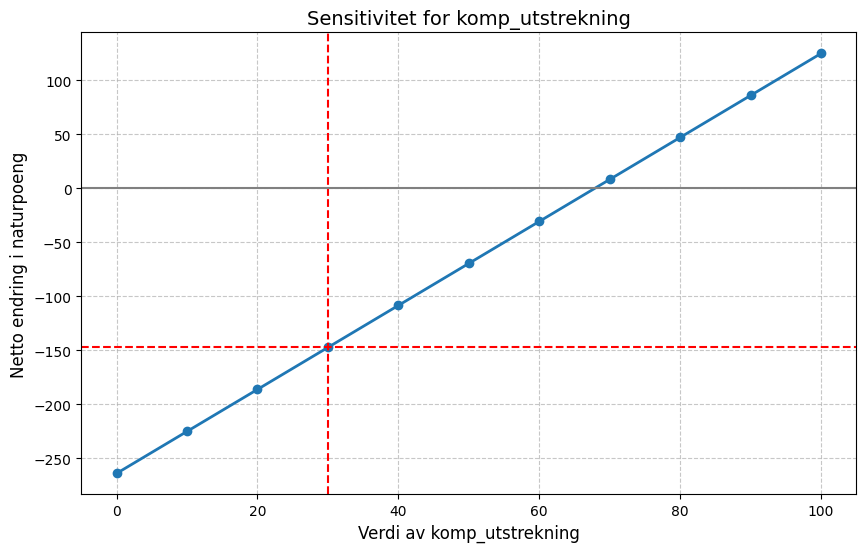

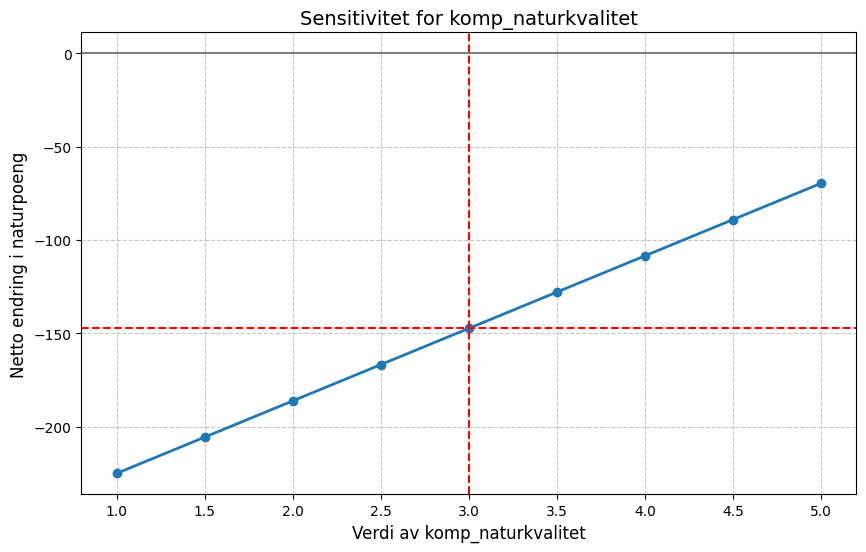

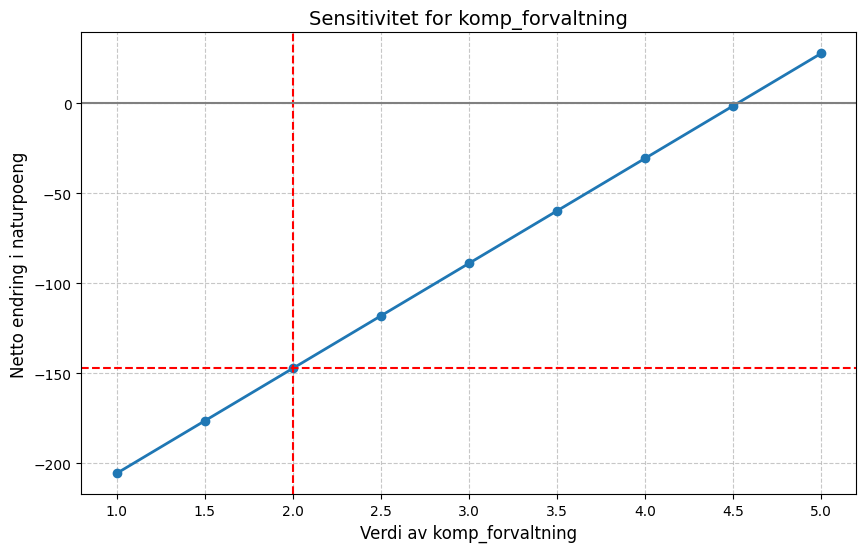

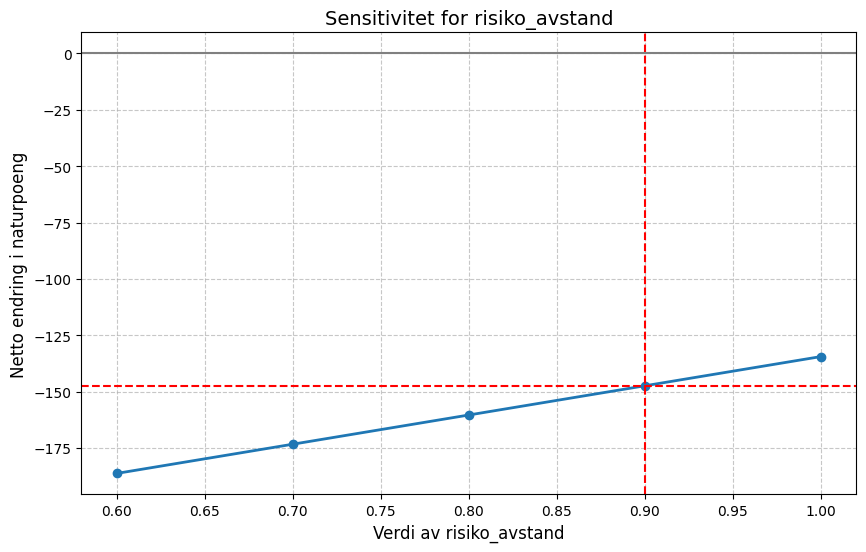

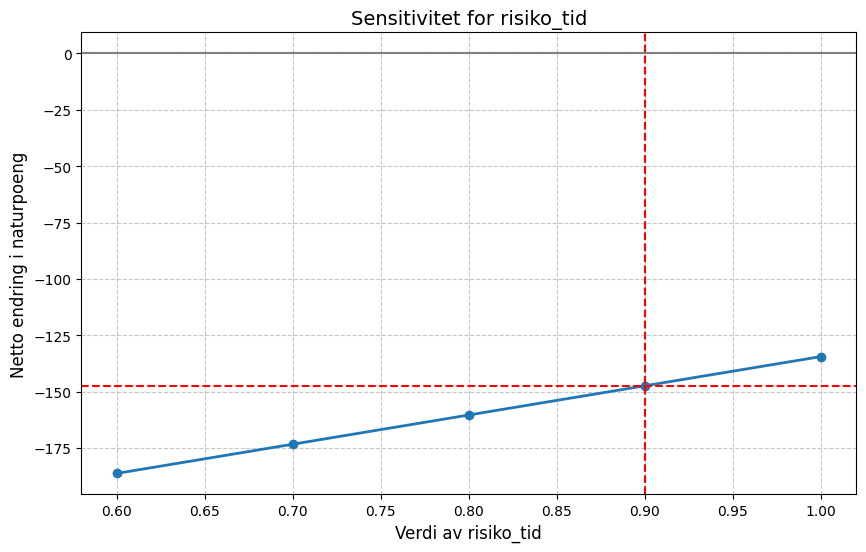

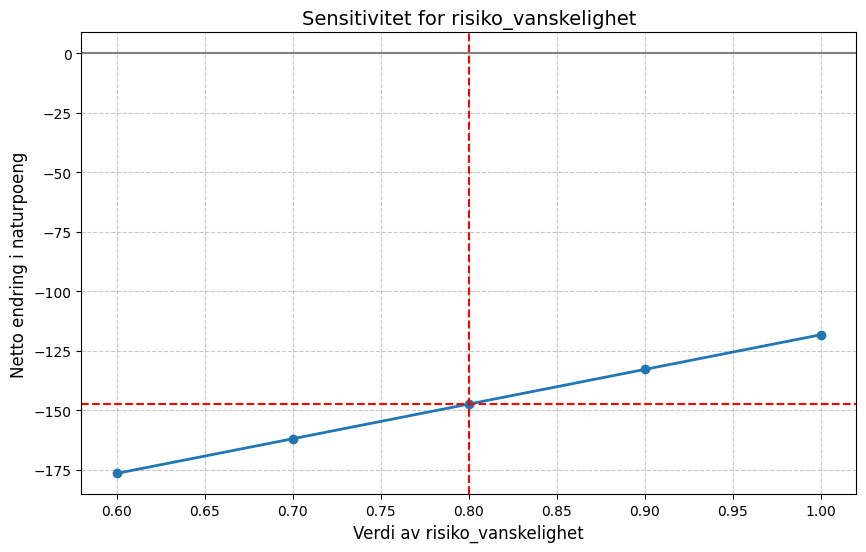

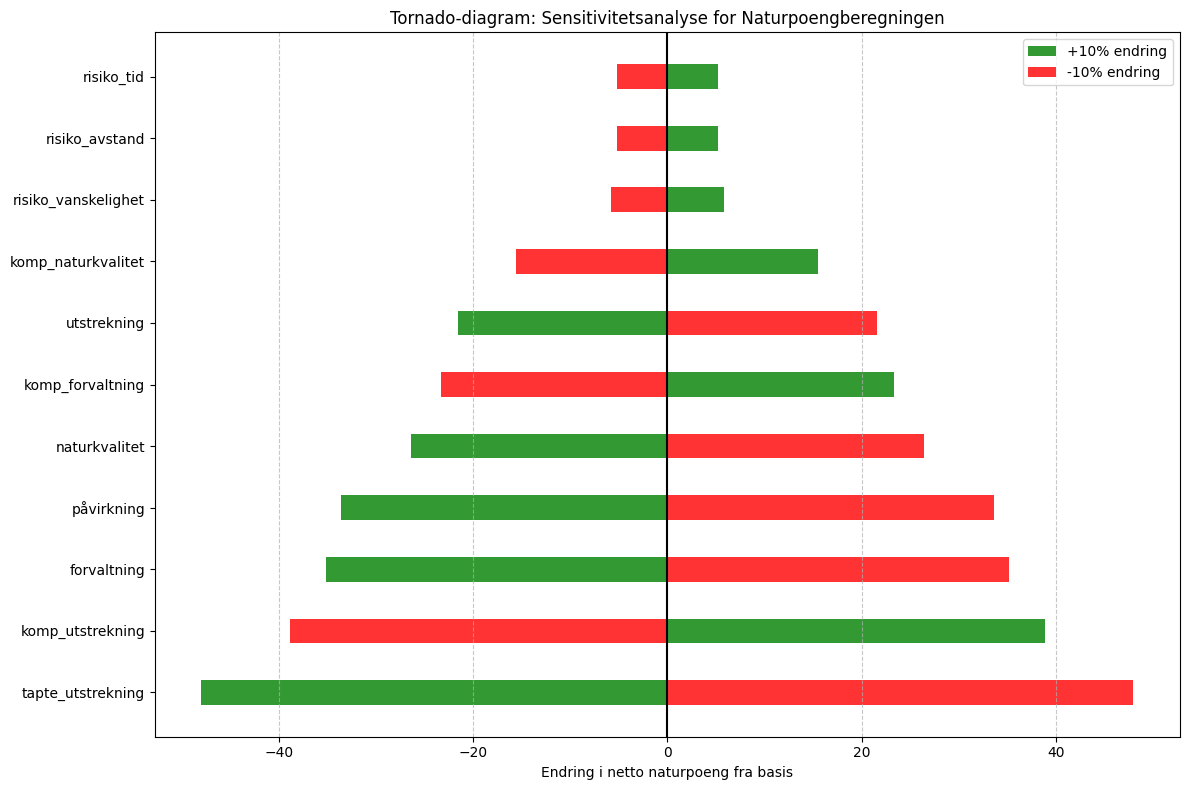

### Rangering av parametrenes betydning

,Parameter,Endring ved +10%,Endring ved -10%,Absolutt påvirkning
0,tapte_utstrekning,-48.0,48.0,96.0
1,komp_utstrekning,38.9,-38.9,77.8
2,forvaltning,-35.2,35.2,70.4
3,påvirkning,-33.6,33.6,67.2
4,naturkvalitet,-26.4,26.4,52.8
5,komp_forvaltning,23.3,-23.3,46.7
6,utstrekning,-21.6,21.6,43.2
7,komp_naturkvalitet,15.6,-15.6,31.1
8,risiko_vanskelighet,5.8,-5.8,11.7
9,risiko_avstand,5.2,-5.2,10.4



    ### Konklusjoner fra sensitivitetsanalysen
    
    Basert på analysen over kan vi trekke følgende konklusjoner:
    
    1. **Parametrene med størst påvirkning** på netto endringen i naturpoeng er (i synkende rekkefølge):
       - De øverste parametrene i tornado-diagrammet har størst påvirkning
       - Disse parametrene bør man være spesielt oppmerksom på ved beregninger
    
    2. **Ikke-lineære forhold:** 
       - Noen parametre viser ikke-lineære forhold til sluttresultatet
       - Dette betyr at samspillet mellom parametre kan gi uventede resultater
    
    3. **Terskelverdier:**
       - For noen parametre finnes det terskelverdier der netto endring skifter fra positiv til negativ
       - Dette indikerer hvor mye kompensasjon som er nødvendig for å veie opp for tapene
    
    4. **Anbefalinger for videre analyse:**
       - Vurder nøye verdiene for parametrene med størst påvirkning
       - Undersøk kombinasjoner av de mest følsomme parametrene for å finne optimale løsninger
       - Kalibrer modellen basert på empiriske data der det er mulig
    

In [35]:
# Sensitivitetsanalyse for naturpoengberegningen - Korrigert versjon
# Denne koden viser hvordan endringer i ulike faktorer påvirker det endelige resultatet

def kjør_sensitivitetsanalyse():
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    from IPython.display import display, Markdown
    
    # Definer standardverdier for analysen (basert på standardinnstillingene i kalkulatoren)
    std_utstrekning = 50.0
    std_naturkvalitet = 4.0
    std_forvaltning = 3.0  # Parameternavn korrigert til 'forvaltning'
    std_tapte_utstrekning = 15.0
    std_påvirkning = 0.2
    std_komp_utstrekning = 30.0
    std_komp_naturkvalitet = 3.0
    std_komp_forvaltning = 2.0
    std_risiko_avstand = 0.9
    std_risiko_tid = 0.9
    std_risiko_vanskelighet = 0.8
    std_er_offsite = False
    std_original_areal = 0.0
    
    # Beregningsfunksjoner (forenklet versjon av funksjonene i hovedkoden)
    def beregn_naturpoeng_før(utstrekning, naturkvalitet, forvaltning):
        return utstrekning * naturkvalitet * forvaltning
        
    def beregn_naturpoeng_tapt(tapte_utstrekning, rest_utstrekning, naturkvalitet, 
                              forvaltning, påvirkning):
        direkte_tap = tapte_utstrekning * naturkvalitet * forvaltning
        indirekte_tap = (rest_utstrekning * naturkvalitet * forvaltning) * påvirkning
        return direkte_tap + indirekte_tap
    
    def beregn_naturpoeng_skapt(komp_utstrekning, komp_naturkvalitet, komp_forvaltning,
                               risiko_avstand, risiko_tid, risiko_vanskelighet,
                               er_offsite=False, original_areal=None):
        skapte_poeng = (komp_utstrekning * komp_naturkvalitet * komp_forvaltning * 
                        risiko_avstand * risiko_tid * risiko_vanskelighet)
        
        if er_offsite and original_areal is not None:
            return skapte_poeng - original_areal
        
        return skapte_poeng
    
    def beregn_netto_resultat(utstrekning, naturkvalitet, forvaltning, 
                             tapte_utstrekning, påvirkning,
                             komp_utstrekning, komp_naturkvalitet, komp_forvaltning,
                             risiko_avstand, risiko_tid, risiko_vanskelighet,
                             er_offsite=False, original_areal=0.0):
        """Beregner netto endring i naturpoeng for gitte parametere"""
        
        # Beregn resterende utstrekning
        rest_utstrekning = utstrekning - tapte_utstrekning
        
        # Beregn naturpoeng før, tapt og skapt
        np_før = beregn_naturpoeng_før(utstrekning, naturkvalitet, forvaltning)
        np_tapt = beregn_naturpoeng_tapt(tapte_utstrekning, rest_utstrekning, 
                                        naturkvalitet, forvaltning, påvirkning)
        np_skapt = beregn_naturpoeng_skapt(komp_utstrekning, komp_naturkvalitet, komp_forvaltning,
                                         risiko_avstand, risiko_tid, risiko_vanskelighet,
                                         er_offsite, original_areal)
        
        # Beregn netto resultat
        np_etter = np_før - np_tapt + np_skapt
        netto_endring = np_etter - np_før
        
        return {
            'np_før': np_før,
            'np_tapt': np_tapt,
            'np_skapt': np_skapt,
            'np_etter': np_etter,
            'netto_endring': netto_endring,
            'prosent_endring': (netto_endring / np_før * 100) if np_før > 0 else 0
        }
    
    # Parametre vi ønsker å undersøke sensitiviteten for
    parametere = [
        {'navn': 'utstrekning', 'min': 10, 'max': 100, 'std': std_utstrekning, 'steg': 10},
        {'navn': 'naturkvalitet', 'min': 1, 'max': 5, 'std': std_naturkvalitet, 'steg': 0.5},
        {'navn': 'forvaltning', 'min': 1, 'max': 5, 'std': std_forvaltning, 'steg': 0.5},  # Korrigert navn
        {'navn': 'tapte_utstrekning', 'min': 0, 'max': 50, 'std': std_tapte_utstrekning, 'steg': 5},
        {'navn': 'påvirkning', 'min': 0, 'max': 0.8, 'std': std_påvirkning, 'steg': 0.1},
        {'navn': 'komp_utstrekning', 'min': 0, 'max': 100, 'std': std_komp_utstrekning, 'steg': 10},
        {'navn': 'komp_naturkvalitet', 'min': 1, 'max': 5, 'std': std_komp_naturkvalitet, 'steg': 0.5},
        {'navn': 'komp_forvaltning', 'min': 1, 'max': 5, 'std': std_komp_forvaltning, 'steg': 0.5},
        {'navn': 'risiko_avstand', 'min': 0.6, 'max': 1.0, 'std': std_risiko_avstand, 'steg': 0.1},
        {'navn': 'risiko_tid', 'min': 0.6, 'max': 1.0, 'std': std_risiko_tid, 'steg': 0.1},
        {'navn': 'risiko_vanskelighet', 'min': 0.6, 'max': 1.0, 'std': std_risiko_vanskelighet, 'steg': 0.1}
    ]
    
    # Beregn basisscenario med standardverdier
    base_case = beregn_netto_resultat(
        std_utstrekning, std_naturkvalitet, std_forvaltning,
        std_tapte_utstrekning, std_påvirkning,
        std_komp_utstrekning, std_komp_naturkvalitet, std_komp_forvaltning,
        std_risiko_avstand, std_risiko_tid, std_risiko_vanskelighet,
        std_er_offsite, std_original_areal
    )
    
    # Vis basisscenario
    display(Markdown(f"""
    ## Sensitivitetsanalyse for Naturpoengberegningen
    
    ### Basisscenario (standardverdier)
    - Utstrekning: {std_utstrekning} dekar
    - Naturkvalitet: {std_naturkvalitet}
    - Forvaltningsinteresse: {std_forvaltning}
    - Tapt direkte: {std_tapte_utstrekning} dekar
    - Påvirkning: {std_påvirkning}
    - Kompensasjonsutstrekning: {std_komp_utstrekning} dekar
    - Kompensasjonsnaturkvalitet: {std_komp_naturkvalitet}
    - Kompensasjonsforvaltningsinteresse: {std_komp_forvaltning}
    - Risiko avstand: {std_risiko_avstand}
    - Risiko tid: {std_risiko_tid}
    - Risiko vanskelighet: {std_risiko_vanskelighet}
    
    **Resultat for basisscenario:**
    - Naturpoeng før: {base_case['np_før']:.1f}
    - Tapte naturpoeng: {base_case['np_tapt']:.1f}
    - Skapte naturpoeng: {base_case['np_skapt']:.1f}
    - Naturpoeng etter: {base_case['np_etter']:.1f}
    - Netto endring: {base_case['netto_endring']:.1f} ({base_case['prosent_endring']:.1f}%)
    """))
    
    # Del 1: Enpunkts sensitivitetsanalyse - endring i hver parameter
    # For hver parameter, beregn resultat for ulike verdier og plot
    
    display(Markdown("### Enpunkts sensitivitetsanalyse - Betydning av hver faktor"))
    
    for param in parametere:
        verdier = np.arange(param['min'], param['max'] + param['steg']/2, param['steg'])
        resultater = []
        
        for verdi in verdier:
            # Lag parametersett med gjeldende parameterverdi
            kwargs = {
                'utstrekning': std_utstrekning,
                'naturkvalitet': std_naturkvalitet, 
                'forvaltning': std_forvaltning,  # Korrigert
                'tapte_utstrekning': std_tapte_utstrekning, 
                'påvirkning': std_påvirkning,
                'komp_utstrekning': std_komp_utstrekning, 
                'komp_naturkvalitet': std_komp_naturkvalitet, 
                'komp_forvaltning': std_komp_forvaltning,
                'risiko_avstand': std_risiko_avstand, 
                'risiko_tid': std_risiko_tid, 
                'risiko_vanskelighet': std_risiko_vanskelighet,
                'er_offsite': std_er_offsite, 
                'original_areal': std_original_areal
            }
            
            # Oppdater med den aktuelle parameterverdien
            kwargs[param['navn']] = verdi
            
            # Kjør beregning med disse parametrene
            resultat = beregn_netto_resultat(**kwargs)
            resultater.append(resultat['netto_endring'])
        
        # Plot resultatene
        plt.figure(figsize=(10, 6))
        plt.plot(verdier, resultater, 'o-', linewidth=2)
        
        # Marker basisscenario med en vertikal linje
        idx = np.abs(verdier - param['std']).argmin()
        plt.axvline(x=param['std'], color='r', linestyle='--')
        plt.axhline(y=resultater[idx], color='r', linestyle='--')
        
        # Marker netto-0-punkt med en horisontal linje
        plt.axhline(y=0, color='gray', linestyle='-')
        
        plt.title(f'Sensitivitet for {param["navn"]}', fontsize=14)
        plt.xlabel(f'Verdi av {param["navn"]}', fontsize=12)
        plt.ylabel('Netto endring i naturpoeng', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    
    # Del 2: Tornado-diagram for relativ påvirkning
    # Beregn endringen ved +/-10% eller +/-20% av hver parameter
    
    endringer = []
    
    for param in parametere:
        # Beregn hvor mye vi skal endre parameteren
        delta = (param['max'] - param['min']) * 0.1
        
        # Lag parametersett med høyere verdi
        høy_verdi = min(param['std'] + delta, param['max'])
        kwargs_høy = {
            'utstrekning': std_utstrekning,
            'naturkvalitet': std_naturkvalitet, 
            'forvaltning': std_forvaltning,  # Korrigert
            'tapte_utstrekning': std_tapte_utstrekning, 
            'påvirkning': std_påvirkning,
            'komp_utstrekning': std_komp_utstrekning, 
            'komp_naturkvalitet': std_komp_naturkvalitet, 
            'komp_forvaltning': std_komp_forvaltning,
            'risiko_avstand': std_risiko_avstand, 
            'risiko_tid': std_risiko_tid, 
            'risiko_vanskelighet': std_risiko_vanskelighet,
            'er_offsite': std_er_offsite, 
            'original_areal': std_original_areal
        }
        kwargs_høy[param['navn']] = høy_verdi
        
        # Lag parametersett med lavere verdi
        lav_verdi = max(param['std'] - delta, param['min'])
        kwargs_lav = dict(kwargs_høy)
        kwargs_lav[param['navn']] = lav_verdi
        
        # Beregn resultater
        res_høy = beregn_netto_resultat(**kwargs_høy)
        res_lav = beregn_netto_resultat(**kwargs_lav)
        
        # Lagre endringene i forhold til basisscenario
        endringer.append({
            'parameter': param['navn'],
            'endring_høy': res_høy['netto_endring'] - base_case['netto_endring'],
            'endring_lav': res_lav['netto_endring'] - base_case['netto_endring'],
            'abs_endring': abs(res_høy['netto_endring'] - res_lav['netto_endring'])
        })
    
    # Sorter etter absolutt endring
    endringer_sortert = sorted(endringer, key=lambda x: x['abs_endring'], reverse=True)
    
    # Lag tornado-diagram
    plt.figure(figsize=(12, 8))
    
    param_labels = [item['parameter'] for item in endringer_sortert]
    endring_høy = [item['endring_høy'] for item in endringer_sortert]
    endring_lav = [item['endring_lav'] for item in endringer_sortert]
    
    y_pos = np.arange(len(param_labels))
    
    # Plot søylene for høye verdier
    plt.barh(y_pos, endring_høy, height=0.4, align='center', alpha=0.8, color='green', label='+10% endring')
    
    # Plot søylene for lave verdier
    plt.barh(y_pos, endring_lav, height=0.4, align='center', alpha=0.8, color='red', label='-10% endring')
    
    # Legg til vertikale linjer
    plt.axvline(x=0, color='black', linestyle='-')
    
    # Juster utseende
    plt.yticks(y_pos, param_labels)
    plt.xlabel('Endring i netto naturpoeng fra basis')
    plt.title('Tornado-diagram: Sensitivitetsanalyse for Naturpoengberegningen')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Del 3: Rangeringsanalyse
    # Ranger parametrene etter hvor mye de påvirker netto endring
    
    # Lag en tabell som viser rangeringen
    ranking_data = []
    for item in endringer_sortert:
        ranking_data.append({
            'Parameter': item['parameter'],
            'Endring ved +10%': f"{item['endring_høy']:.1f}",
            'Endring ved -10%': f"{item['endring_lav']:.1f}",
            'Absolutt påvirkning': f"{item['abs_endring']:.1f}"
        })
    
    # Vis tabellen
    df_ranking = pd.DataFrame(ranking_data)
    display(Markdown("### Rangering av parametrenes betydning"))
    display(df_ranking)
    
    # Del 4: Avsluttende analyse
    display(Markdown("""
    ### Konklusjoner fra sensitivitetsanalysen
    
    Basert på analysen over kan vi trekke følgende konklusjoner:
    
    1. **Parametrene med størst påvirkning** på netto endringen i naturpoeng er (i synkende rekkefølge):
       - De øverste parametrene i tornado-diagrammet har størst påvirkning
       - Disse parametrene bør man være spesielt oppmerksom på ved beregninger
    
    2. **Ikke-lineære forhold:** 
       - Noen parametre viser ikke-lineære forhold til sluttresultatet
       - Dette betyr at samspillet mellom parametre kan gi uventede resultater
    
    3. **Terskelverdier:**
       - For noen parametre finnes det terskelverdier der netto endring skifter fra positiv til negativ
       - Dette indikerer hvor mye kompensasjon som er nødvendig for å veie opp for tapene
    
    4. **Anbefalinger for videre analyse:**
       - Vurder nøye verdiene for parametrene med størst påvirkning
       - Undersøk kombinasjoner av de mest følsomme parametrene for å finne optimale løsninger
       - Kalibrer modellen basert på empiriske data der det er mulig
    """))

# Kjør sensitivitetsanalysen
kjør_sensitivitetsanalyse()

In [41]:
# Celle 5: Breakeven-analyse
# Viser nøyaktig hvor mye kompensasjon som trengs for å nå "nulltap" for ulike parametere

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

def breakeven_analyse():
    # Standardverdier for området
    utstrekning = widgets.FloatSlider(value=50.0, min=10.0, max=100.0, step=5.0, 
                                     description='Utstrekning (dekar):')
    naturkvalitet = widgets.FloatSlider(value=4.0, min=1.0, max=5.0, step=0.5, 
                                       description='Naturkvalitet:')
    forvaltning = widgets.FloatSlider(value=3.0, min=1.0, max=5.0, step=0.5, 
                                     description='Forvaltningsinteresse:')
    
    # Tapsverdier
    tapte_utstrekning = widgets.FloatSlider(value=15.0, min=0.0, max=50.0, step=5.0, 
                                           description='Tapt direkte (dekar):')
    påvirkning = widgets.FloatSlider(value=0.2, min=0.0, max=0.8, step=0.1, 
                                     description='Påvirkning på rest:')
    
    # Kompensasjonsverdier
    komp_naturkvalitet = widgets.FloatSlider(value=3.0, min=1.0, max=5.0, step=0.5, 
                                            description='Komp. naturkvalitet:')
    komp_forvaltning = widgets.FloatSlider(value=2.0, min=1.0, max=5.0, step=0.5, 
                                          description='Komp. forvaltning:')
    
    # Risikofaktorer
    risiko_avstand = widgets.FloatSlider(value=0.9, min=0.6, max=1.0, step=0.1, 
                                        description='Risiko avstand:')
    risiko_tid = widgets.FloatSlider(value=0.9, min=0.6, max=1.0, step=0.1, 
                                    description='Risiko tid:')
    risiko_vanskelighet = widgets.FloatSlider(value=0.8, min=0.6, max=1.0, step=0.1, 
                                             description='Risiko vanskelighet:')
    
    # Variabler for break-even analyse
    analyse_variabel = widgets.Dropdown(
        options=[
            ('Kompensasjonsareal', 'komp_areal'),
            ('Kompensasjon naturkvalitet', 'komp_nk'),
            ('Kompensasjon forvaltning', 'komp_f'),
            ('Risiko avstand', 'risiko_a'),
            ('Risiko tid', 'risiko_t'),
            ('Risiko vanskelighet', 'risiko_v')
        ],
        value='komp_areal',
        description='Analyser effekt av:'
    )
    
    # Knapp for å kjøre analysen
    analyse_knapp = widgets.Button(description='Kjør breakeven-analyse')
    output = widgets.Output()
    
    # Beregningsfunksjoner
    def beregn_naturpoeng_før(utstrekning, naturkvalitet, forvaltning):
        return utstrekning * naturkvalitet * forvaltning
    
    def beregn_naturpoeng_tapt(tapte_utstrekning, rest_utstrekning, naturkvalitet, 
                              forvaltning, påvirkning):
        direkte_tap = tapte_utstrekning * naturkvalitet * forvaltning
        indirekte_tap = (rest_utstrekning * naturkvalitet * forvaltning) * påvirkning
        return direkte_tap + indirekte_tap
    
    def beregn_naturpoeng_skapt(komp_utstrekning, komp_naturkvalitet, komp_forvaltning,
                               risiko_avstand, risiko_tid, risiko_vanskelighet):
        return (komp_utstrekning * komp_naturkvalitet * komp_forvaltning * 
                risiko_avstand * risiko_tid * risiko_vanskelighet)
    
    def beregn_breakeven(variabel, u, nk, f, tu, p, knk, kf, ra, rt, rv):
        # Beregn resterende utstrekning og tapte naturpoeng
        ru = u - tu
        np_før = beregn_naturpoeng_før(u, nk, f)
        np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, f, p)
        
        # Definer variabler for de ulike tilfellene
        if variabel == 'komp_areal':
            # Beregn nødvendig areal for nulltap
            komp_faktor = knk * kf * ra * rt * rv
            if komp_faktor > 0:
                return np_tapt / komp_faktor
            else:
                return float('inf')
        elif variabel == 'komp_nk':
            # Beregn nødvendig naturkvalitet for nulltap med 30 dekar areal
            komp_areal = 30.0
            andre_faktorer = kf * ra * rt * rv
            if andre_faktorer > 0 and komp_areal > 0:
                return np_tapt / (komp_areal * andre_faktorer)
            else:
                return float('inf')
        elif variabel == 'komp_f':
            # Beregn nødvendig forvaltningsinteresse for nulltap med 30 dekar areal
            komp_areal = 30.0
            andre_faktorer = knk * ra * rt * rv
            if andre_faktorer > 0 and komp_areal > 0:
                return np_tapt / (komp_areal * andre_faktorer)
            else:
                return float('inf')
        elif variabel in ['risiko_a', 'risiko_t', 'risiko_v']:
            # Beregn nødvendig risikofaktor for nulltap med 30 dekar areal
            komp_areal = 30.0
            if variabel == 'risiko_a':
                andre_faktorer = knk * kf * rt * rv
            elif variabel == 'risiko_t':
                andre_faktorer = knk * kf * ra * rv
            else:  # risiko_v
                andre_faktorer = knk * kf * ra * rt
            
            if andre_faktorer > 0 and komp_areal > 0:
                return np_tapt / (komp_areal * andre_faktorer)
            else:
                return float('inf')
    
    # Funksjon for å kjøre analysen
    def på_klikk_analyse(b):
        with output:
            clear_output()
            
            # Hent verdier
            u = utstrekning.value
            nk = naturkvalitet.value
            f = forvaltning.value
            tu = tapte_utstrekning.value
            p = påvirkning.value
            knk = komp_naturkvalitet.value
            kf = komp_forvaltning.value
            ra = risiko_avstand.value
            rt = risiko_tid.value
            rv = risiko_vanskelighet.value
            
            # Beregn resterende utstrekning
            ru = u - tu
            
            # Beregn naturpoeng før og tapt
            np_før = beregn_naturpoeng_før(u, nk, f)
            np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, f, p)
            
            # Beregn breakeven-verdi
            variabel = analyse_variabel.value
            break_value = beregn_breakeven(variabel, u, nk, f, tu, p, knk, kf, ra, rt, rv)
            
            # Vis resultat
            variabel_navn = {
                'komp_areal': 'kompensasjonsareal',
                'komp_nk': 'kompensasjon naturkvalitet',
                'komp_f': 'kompensasjon forvaltningsinteresse',
                'risiko_a': 'risiko avstand',
                'risiko_t': 'risiko tid',
                'risiko_v': 'risiko vanskelighet'
            }
            
            display(Markdown(f"""
            ## Breakeven-analyse for {variabel_navn[variabel]}
            
            **Prosjektområde og påvirkning:**
            - Utstrekning: {u:.1f} dekar
            - Naturkvalitet: {nk:.1f}
            - Forvaltningsinteresse: {f:.1f}
            - Naturpoeng før inngrep: {np_før:.1f}
            - Tapt ved inngrep: {np_tapt:.1f} naturpoeng
            
            **Resultater:**
            For å oppnå nulltap (ingen netto endring i naturpoeng) med de gitte parameterne, 
            trengs det en verdi på **{break_value:.2f}** for {variabel_navn[variabel]}.
            """))
            
            # Hvis verdien er utenfor normale grenser, gi en advarsel
            if (variabel == 'komp_areal' and break_value > 100) or \
               (variabel in ['komp_nk', 'komp_f'] and break_value > 5) or \
               (variabel in ['risiko_a', 'risiko_t', 'risiko_v'] and break_value > 1):
                display(Markdown(f"""
                **Advarsel:** Den beregnede verdien er utenfor normale grenser. 
                Dette kan skyldes at tapet er for stort i forhold til kompensasjonspotensialet.
                Vurder å redusere tapet eller øke andre kompensasjonsfaktorer.
                """))
            
            # Lag figur for analyse av valgt variabel
            plt.figure(figsize=(12, 7))
            
            # Definer x-verdier basert på valgt variabel
            if variabel == 'komp_areal':
                x_verdier = np.linspace(0, min(200, break_value*2), 100)
                x_label = 'Kompensasjonsareal (dekar)'
                curr_value = 30  # Antatt standardverdi
            elif variabel in ['komp_nk', 'komp_f']:
                x_verdier = np.linspace(1, min(5, break_value*1.5), 100)
                x_label = 'Kompensasjon ' + ('naturkvalitet' if variabel == 'komp_nk' else 'forvaltningsinteresse')
                curr_value = knk if variabel == 'komp_nk' else kf
            else:  # risikofaktorer
                x_verdier = np.linspace(0.6, min(1.0, break_value*1.2), 100)
                if variabel == 'risiko_a':
                    x_label = 'Risiko avstand'
                    curr_value = ra
                elif variabel == 'risiko_t':
                    x_label = 'Risiko tid'
                    curr_value = rt
                else:
                    x_label = 'Risiko vanskelighet'
                    curr_value = rv
            
            # Beregn naturpoeng etter kompensasjon for hver x-verdi
            np_etter_verdier = []
            
            for x in x_verdier:
                # Beregn np_skapt basert på variabel
                if variabel == 'komp_areal':
                    np_skapt = beregn_naturpoeng_skapt(x, knk, kf, ra, rt, rv)
                elif variabel == 'komp_nk':
                    np_skapt = beregn_naturpoeng_skapt(30, x, kf, ra, rt, rv)
                elif variabel == 'komp_f':
                    np_skapt = beregn_naturpoeng_skapt(30, knk, x, ra, rt, rv)
                elif variabel == 'risiko_a':
                    np_skapt = beregn_naturpoeng_skapt(30, knk, kf, x, rt, rv)
                elif variabel == 'risiko_t':
                    np_skapt = beregn_naturpoeng_skapt(30, knk, kf, ra, x, rv)
                else:  # risiko_v
                    np_skapt = beregn_naturpoeng_skapt(30, knk, kf, ra, rt, x)
                
                np_etter = np_før - np_tapt + np_skapt
                np_etter_verdier.append(np_etter)
            
            # Plot netto naturpoeng etter kompensasjon
            plt.plot(x_verdier, np_etter_verdier, 'b-', linewidth=2.5, label='Naturpoeng etter kompensasjon')
            
            # Legg til horisontal linje for naturpoeng før inngrep (nulltap-linje)
            plt.axhline(y=np_før, color='g', linestyle='--', 
                       label=f'Naturpoeng før inngrep: {np_før:.1f}')
            
            # Legg til vertikal linje for breakeven-verdien
            plt.axvline(x=break_value, color='r', linestyle='--', 
                       label=f'Breakeven-verdi: {break_value:.2f}')
            
            # Legg til vertikal linje for gjeldende verdi
            plt.axvline(x=curr_value, color='purple', linestyle=':', 
                       label=f'Gjeldende verdi: {curr_value:.2f}')
            
            # Marker skjæringspunktet mellom nødvendig verdi og nulltap-linjen
            plt.plot(break_value, np_før, 'ro', markersize=8)
            
            # Legg til horisontal linje for naturpoeng uten kompensasjon
            np_uten_komp = np_før - np_tapt
            plt.axhline(y=np_uten_komp, color='r', linestyle=':', alpha=0.7,
                       label=f'Uten kompensasjon: {np_uten_komp:.1f}')
            
            # Beregn netto endring med gjeldende verdi
            if variabel == 'komp_areal':
                np_skapt_curr = beregn_naturpoeng_skapt(curr_value, knk, kf, ra, rt, rv)
            elif variabel == 'komp_nk':
                np_skapt_curr = beregn_naturpoeng_skapt(30, curr_value, kf, ra, rt, rv)
            elif variabel == 'komp_f':
                np_skapt_curr = beregn_naturpoeng_skapt(30, knk, curr_value, ra, rt, rv)
            elif variabel == 'risiko_a':
                np_skapt_curr = beregn_naturpoeng_skapt(30, knk, kf, curr_value, rt, rv)
            elif variabel == 'risiko_t':
                np_skapt_curr = beregn_naturpoeng_skapt(30, knk, kf, ra, curr_value, rv)
            else:  # risiko_v
                np_skapt_curr = beregn_naturpoeng_skapt(30, knk, kf, ra, rt, curr_value)
            
            np_etter_curr = np_før - np_tapt + np_skapt_curr
            plt.plot(curr_value, np_etter_curr, 'mo', markersize=8)
            
            # Sett titler og aksenavn
            plt.title(f'Breakeven-analyse for {variabel_navn[variabel]}', fontsize=14)
            plt.xlabel(x_label, fontsize=12)
            plt.ylabel('Naturpoeng etter inngrep og kompensasjon', fontsize=12)
            
            # Legg til rutenett og tegnforklaring
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.legend(fontsize=10, loc='best')
            
            # Sett y-akseområde
            min_y = min(np_uten_komp * 0.9, min(np_etter_verdier))
            max_y = max(np_før * 1.1, max(np_etter_verdier))
            plt.ylim(min_y, max_y)
            
            plt.tight_layout()
            plt.show()
            
            # Analyser følsomhet for andre variabler hvis det er kompensasjonsareal som analyseres
            if variabel == 'komp_areal':
                # Lag en figur som viser hvordan breakeven-arealet endres med ulik kompensasjonskvalitet
                plt.figure(figsize=(12, 7))
                
                knk_verdier = [2.0, 3.0, 4.0, 5.0]  # Ulike naturkvaliteter å teste
                kf_verdier = [1.0, 2.0, 3.0, 4.0, 5.0]  # Ulike forvaltningsverdier
                
                # Lag en matrise for alle kombinasjoner
                X, Y = np.meshgrid(kf_verdier, knk_verdier)
                Z = np.zeros_like(X)
                
                for i, knk_val in enumerate(knk_verdier):
                    for j, kf_val in enumerate(kf_verdier):
                        Z[i, j] = beregn_breakeven('komp_areal', u, nk, f, tu, p, knk_val, kf_val, ra, rt, rv)
                        # Begrens for visualisering
                        Z[i, j] = min(Z[i, j], 200)
                
                # Plot konturdiagram
                contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis_r')
                contour_lines = plt.contour(X, Y, Z, levels=[20, 40, 60, 100, 150], colors='white', alpha=0.8)
                plt.clabel(contour_lines, inline=True, fontsize=10)
                
                # Legg til fargeskala
                cbar = plt.colorbar(contour)
                cbar.set_label('Nødvendig kompensasjonsareal (dekar)')
                
                # Marker gjeldende kvalitetsverdier
                plt.plot(kf, knk, 'ro', markersize=10)
                plt.text(kf+0.1, knk+0.1, f'({kf}, {knk})', color='red', fontweight='bold')
                
                # Sett titler og aksenavn
                plt.title('Nødvendig kompensasjonsareal ved ulik kompensasjonskvalitet', fontsize=14)
                plt.xlabel('Kompensasjon forvaltningsinteresse', fontsize=12)
                plt.ylabel('Kompensasjon naturkvalitet', fontsize=12)
                
                plt.grid(False)
                plt.tight_layout()
                plt.show()
                
                # Vis en tabell med alternativer
                display(Markdown("""
                ### Alternative kompensasjonsstrategier for å oppnå nulltap
                
                Her er noen ulike strategier for å oppnå nulltap:
                """))
                
                # Definer strategier
                strategier = [
                    ('Dårlig kvalitet, stort areal', 2.0, 2.0),
                    ('Middels kvalitet, middels areal', 3.0, 3.0),
                    ('Høy kvalitet, lite areal', 4.0, 4.0),
                    ('Svært høy kvalitet, minimalt areal', 5.0, 5.0),
                    ('Gjeldende verdier', knk, kf)
                ]
                
                # Lag tabell
                strategi_tabell = "| Strategi | Naturkvalitet | Forvaltning | Nødvendig areal (dekar) |\n"
                strategi_tabell += "|---------|--------------|------------|------------------------|\n"
                
                for navn, k_nk, k_f in strategier:
                    areal = beregn_breakeven('komp_areal', u, nk, f, tu, p, k_nk, k_f, ra, rt, rv)
                    strategi_tabell += f"| {navn} | {k_nk:.1f} | {k_f:.1f} | {areal:.1f} |\n"
                
                display(Markdown(strategi_tabell))
    
    # Koble knappen til funksjonen
    analyse_knapp.on_click(på_klikk_analyse)
    
    # Lag layout
    venstre_kolonne = widgets.VBox([
        widgets.HTML("<h3>Prosjektområde</h3>"),
        utstrekning, naturkvalitet, forvaltning,
        widgets.HTML("<h3>Inngrep og påvirkning</h3>"),
        tapte_utstrekning, påvirkning
    ])
    
    høyre_kolonne = widgets.VBox([
        widgets.HTML("<h3>Kompensasjonskvalitet</h3>"),
        komp_naturkvalitet, komp_forvaltning,
        widgets.HTML("<h3>Risikofaktorer</h3>"),
        risiko_avstand, risiko_tid, risiko_vanskelighet,
        widgets.HTML("<h3>Analysealternativ</h3>"),
        analyse_variabel
    ])
    
    # Vis widgeter
    display(widgets.HBox([venstre_kolonne, høyre_kolonne]))
    display(analyse_knapp)
    display(output)

# Kjør funksjonen
breakeven_analyse()

Button(description='Kjør breakeven-analyse', style=ButtonStyle())

Output()

In [44]:
# Celle 7: Tidsdimensjonsvisualisering
# Viser hvordan naturpoeng utvikler seg over tid ved forskjellige kompensasjonsstrategier

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output
from matplotlib.animation import FuncAnimation

def tidsdimensjonsvisualisering():
    # Standardverdier for området
    utstrekning = widgets.FloatSlider(
        value=50.0, min=10.0, max=100.0, step=5.0, 
        description='Utstrekning (dekar):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    naturkvalitet = widgets.FloatSlider(
        value=4.0, min=1.0, max=5.0, step=0.5, 
        description='Naturkvalitet:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    forvaltning = widgets.FloatSlider(
        value=3.0, min=1.0, max=5.0, step=0.5, 
        description='Forvaltningsinteresse:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    
    # Tapsverdier
    tapte_utstrekning = widgets.FloatSlider(
        value=15.0, min=0.0, max=50.0, step=5.0, 
        description='Tapt direkte (dekar):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    påvirkning = widgets.FloatSlider(
        value=0.2, min=0.0, max=0.8, step=0.1, 
        description='Påvirkning på resterende:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    
    # Kompensasjonsstrategi 1 - Standard
    komp1_utstrekning = widgets.FloatSlider(
        value=30.0, min=0.0, max=100.0, step=5.0, 
        description='Kompensasjon 1 areal (dekar):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    komp1_naturkvalitet = widgets.FloatSlider(
        value=3.0, min=1.0, max=5.0, step=0.5, 
        description='Kompensasjon 1 naturkvalitet:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    komp1_forvaltning = widgets.FloatSlider(
        value=2.0, min=1.0, max=5.0, step=0.5, 
        description='Kompensasjon 1 forvaltning:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    komp1_tidsperspektiv = widgets.IntSlider(
        value=10, min=1, max=30, step=1, 
        description='Kompensasjon 1 tid til maks (år):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    
    # Kompensasjonsstrategi 2 - Alternativ
    komp2_utstrekning = widgets.FloatSlider(
        value=20.0, min=0.0, max=100.0, step=5.0, 
        description='Kompensasjon 2 areal (dekar):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    komp2_naturkvalitet = widgets.FloatSlider(
        value=4.0, min=1.0, max=5.0, step=0.5, 
        description='Kompensasjon 2 naturkvalitet:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    komp2_forvaltning = widgets.FloatSlider(
        value=3.0, min=1.0, max=5.0, step=0.5, 
        description='Kompensasjon 2 forvaltning:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    komp2_tidsperspektiv = widgets.IntSlider(
        value=20, min=1, max=30, step=1, 
        description='Kompensasjon 2 tid til maks (år):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    
    # Risikofaktorer (felles for begge strategier)
    risiko_avstand = widgets.FloatSlider(
        value=0.9, min=0.6, max=1.0, step=0.1, 
        description='Risikofaktor for avstand:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    risiko_vanskelighet = widgets.FloatSlider(
        value=0.8, min=0.6, max=1.0, step=0.1, 
        description='Risikofaktor for vanskelighet:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    
    # Simuleringsparametere
    max_år = widgets.IntSlider(
        value=30, min=5, max=50, step=5, 
        description='Antall år i simulering:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='100%')
    )
    
    # Knapp for å kjøre visualisering
    visualiser_knapp = widgets.Button(
        description='Vis tidsdimensjon og sammenlign strategier',
        layout=widgets.Layout(width='50%')
    )
    output = widgets.Output()
    
    # Beregningsfunksjoner
    def beregn_naturpoeng_før(utstrekning, naturkvalitet, forvaltning):
        return utstrekning * naturkvalitet * forvaltning
    
    def beregn_naturpoeng_tapt(tapte_utstrekning, rest_utstrekning, naturkvalitet, 
                              forvaltning, påvirkning):
        direkte_tap = tapte_utstrekning * naturkvalitet * forvaltning
        indirekte_tap = (rest_utstrekning * naturkvalitet * forvaltning) * påvirkning
        return direkte_tap + indirekte_tap
    
    def beregn_naturpoeng_skapt(komp_utstrekning, komp_naturkvalitet, komp_forvaltning,
                               risiko_avstand, risiko_tid, risiko_vanskelighet):
        return (komp_utstrekning * komp_naturkvalitet * komp_forvaltning * 
                risiko_avstand * risiko_tid * risiko_vanskelighet)
    
    def beregn_risiko_tid_over_årene(år, max_år, start_verdi=0.6):
        """Beregner risiko for tidsfaktor over årene, fra 0.6 (laveste) til 1.0 (ingen risiko)"""
        if år >= max_år:
            return 1.0
        else:
            # Lineær interpolasjon fra start_verdi til 1.0
            return start_verdi + (1.0 - start_verdi) * (år / max_år)
    
    def beregn_kvalitet_over_årene(år, max_år, max_kvalitet):
        """Beregner naturkvalitet over tid med S-kurve (logistisk funksjon)"""
        if år >= max_år:
            return max_kvalitet
        else:
            # S-kurve fra 0.25*max_kvalitet til max_kvalitet
            midpoint = max_år / 2
            steepness = 6 / max_år  # Justerer bratthet basert på max_år
            base = 0.25 * max_kvalitet
            return base + (max_kvalitet - base) / (1 + np.exp(-steepness * (år - midpoint)))
    
    # Funksjon for å kjøre visualiseringen
    def på_klikk_visualiser(b):
        with output:
            clear_output()
            
            # Hent verdier
            u = utstrekning.value
            nk = naturkvalitet.value
            f = forvaltning.value
            tu = tapte_utstrekning.value
            p = påvirkning.value
            
            ku1 = komp1_utstrekning.value
            knk1 = komp1_naturkvalitet.value
            kf1 = komp1_forvaltning.value
            kt1 = komp1_tidsperspektiv.value
            
            ku2 = komp2_utstrekning.value
            knk2 = komp2_naturkvalitet.value
            kf2 = komp2_forvaltning.value
            kt2 = komp2_tidsperspektiv.value
            
            ra = risiko_avstand.value
            rv = risiko_vanskelighet.value
            
            sim_max_år = max_år.value
            
            # Beregn resterende utstrekning
            ru = u - tu
            
            # Beregn naturpoeng før og tapt
            np_før = beregn_naturpoeng_før(u, nk, f)
            np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, f, p)
            np_uten_komp = np_før - np_tapt
            
            # Simuler utviklingen over tid
            år_liste = np.arange(0, sim_max_år + 1)
            np_strategi1 = []
            np_strategi2 = []
            kval_strategi1 = []
            kval_strategi2 = []
            risiko_tid_liste = []
            
            for år in år_liste:
                # Beregn risiko for tid for dette året
                rt1 = beregn_risiko_tid_over_årene(år, kt1)
                rt2 = beregn_risiko_tid_over_årene(år, kt2)
                risiko_tid_liste.append(rt1)  # Bare lagre den første for visualisering
                
                # Beregn naturkvalitet for dette året (starter lavere og øker over tid)
                kvalitet1 = beregn_kvalitet_over_årene(år, kt1, knk1)
                kvalitet2 = beregn_kvalitet_over_årene(år, kt2, knk2)
                kval_strategi1.append(kvalitet1)
                kval_strategi2.append(kvalitet2)
                
                # Beregn naturpoeng skapt med dagens risiko og kvalitet
                np_skapt1 = beregn_naturpoeng_skapt(ku1, kvalitet1, kf1, ra, rt1, rv)
                np_skapt2 = beregn_naturpoeng_skapt(ku2, kvalitet2, kf2, ra, rt2, rv)
                
                # Beregn totalt naturpoeng etter kompensasjon
                np_etter1 = np_uten_komp + np_skapt1
                np_etter2 = np_uten_komp + np_skapt2
                
                np_strategi1.append(np_etter1)
                np_strategi2.append(np_etter2)
            
            # Lag figur for tidsutviklingen
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})
            
            # Plot utvikling i naturpoeng
            ax1.plot(år_liste, [np_før] * len(år_liste), 'g--', linewidth=2, 
                    label=f'Naturpoeng før inngrep: {np_før:.1f}')
            ax1.plot(år_liste, [np_uten_komp] * len(år_liste), 'r--', linewidth=2, 
                    label=f'Naturpoeng uten kompensasjon: {np_uten_komp:.1f}')
            ax1.plot(år_liste, np_strategi1, 'b-', linewidth=2.5, 
                    label=f'Strategi 1: Større areal, lavere kvalitet ({ku1} daa, {knk1} kval)')
            ax1.plot(år_liste, np_strategi2, 'm-', linewidth=2.5, 
                    label=f'Strategi 2: Mindre areal, høyere kvalitet ({ku2} daa, {knk2} kval)')
            
            # Marker tidspunkter for full realisering
            ax1.axvline(x=kt1, color='b', linestyle=':', alpha=0.7, 
                       label=f'Strategi 1 realisert etter {kt1} år')
            ax1.axvline(x=kt2, color='m', linestyle=':', alpha=0.7, 
                       label=f'Strategi 2 realisert etter {kt2} år')
            
            # Marker når strategiene når nulltap (hvis de gjør det)
            for i, np_verdi in enumerate(np_strategi1):
                if np_verdi >= np_før and i > 0 and np_strategi1[i-1] < np_før:
                    ax1.plot(i, np_før, 'bo', markersize=8)
                    ax1.annotate(f'Nulltap ved {i} år', xy=(i, np_før), xytext=(i+1, np_før+10),
                                arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10)
                    break
            
            for i, np_verdi in enumerate(np_strategi2):
                if np_verdi >= np_før and i > 0 and np_strategi2[i-1] < np_før:
                    ax1.plot(i, np_før, 'mo', markersize=8)
                    ax1.annotate(f'Nulltap ved {i} år', xy=(i, np_før), xytext=(i+1, np_før-10),
                                arrowprops=dict(facecolor='magenta', shrink=0.05), fontsize=10)
                    break
            
            # Sett titler og aksenavn
            ax1.set_title('Utvikling av naturpoeng over tid', fontsize=14)
            ax1.set_xlabel('År etter inngrep', fontsize=12)
            ax1.set_ylabel('Naturpoeng', fontsize=12)
            
            # Legg til rutenett og tegnforklaring
            ax1.grid(True, linestyle='--', alpha=0.7)
            ax1.legend(fontsize=10, loc='best')
            
            # Plot 2: Utvikling i naturkvalitet og risikofaktor over tid
            ax2.plot(år_liste, kval_strategi1, 'b-', linewidth=2, label='Naturkvalitet strategi 1')
            ax2.plot(år_liste, kval_strategi2, 'm-', linewidth=2, label='Naturkvalitet strategi 2')
            ax2.plot(år_liste, risiko_tid_liste, 'g-', linewidth=1.5, label='Risikofaktor tid')
            
            # Formater plot
            ax2.set_title('Utvikling av naturkvalitet og risikofaktor tid', fontsize=12)
            ax2.set_xlabel('År etter inngrep', fontsize=10)
            ax2.set_ylabel('Verdi', fontsize=10)
            ax2.set_ylim(0, 5.5)
            ax2.grid(True, linestyle='--', alpha=0.7)
            ax2.legend(fontsize=10, loc='best')
            
            plt.tight_layout()
            plt.show()
            
            # Vis tidsforsinkelse av naturpoeng
            fig, ax = plt.subplots(figsize=(10, 6))
            
            # Diskontere naturpoeng over tid med ulike diskonteringsrater
            diskonteringsrater = [0.0, 0.02, 0.05]
            for rate in diskonteringsrater:
                diskonterte_np1 = []
                diskonterte_np2 = []
                
                for år in range(len(np_strategi1)):
                    diskonteringsfaktor = 1 / ((1 + rate) ** år) if år > 0 else 1
                    diskonterte_np1.append(np_strategi1[år] * diskonteringsfaktor)
                    diskonterte_np2.append(np_strategi2[år] * diskonteringsfaktor)
                
                if rate == 0:
                    # Allerede plottet i forrige diagram, ikke gjenta
                    continue
                else:
                    ax.plot(år_liste, diskonterte_np1, 'b--', alpha=0.7, 
                            label=f'Strategi 1 med {rate*100:.0f}% diskontering')
                    ax.plot(år_liste, diskonterte_np2, 'm--', alpha=0.7, 
                            label=f'Strategi 2 med {rate*100:.0f}% diskontering')
            
            # Legg til referanse for originale kurver
            ax.plot(år_liste, np_strategi1, 'b-', linewidth=2.5, 
                   label=f'Strategi 1 uten diskontering')
            ax.plot(år_liste, np_strategi2, 'm-', linewidth=2.5, 
                   label=f'Strategi 2 uten diskontering')
            
            ax.plot(år_liste, [np_før] * len(år_liste), 'g--', linewidth=2, 
                   label=f'Naturpoeng før inngrep')
            
            # Sett titler og aksenavn
            ax.set_title('Effekt av tidsdiskontering på naturpoeng', fontsize=14)
            ax.set_xlabel('År etter inngrep', fontsize=12)
            ax.set_ylabel('Diskonterte naturpoeng', fontsize=12)
            
            # Legg til rutenett og tegnforklaring
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.legend(fontsize=10, loc='best')
            
            plt.tight_layout()
            plt.show()
            
            # Vis sammendrag av resultater
            display(Markdown(f"""
            ## Sammendrag av resultater over {sim_max_år} år
            
            **Basisverdier:**
            - Naturpoeng før inngrep: {np_før:.1f}
            - Naturpoeng uten kompensasjon: {np_uten_komp:.1f}
            - Tap av naturpoeng: {np_tapt:.1f} ({np_tapt/np_før*100:.1f}% av opprinnelig verdi)
            
            **Strategi 1: Større areal, lavere kvalitet**
            - Kompensasjonsareal: {ku1:.1f} dekar
            - Maksimal naturkvalitet: {knk1:.1f}
            - Tid til full realisering: {kt1} år
            - Sluttverdier: {np_strategi1[-1]:.1f} naturpoeng ({(np_strategi1[-1]-np_før)/np_før*100:.1f}% av opprinnelig)
            
            **Strategi 2: Mindre areal, høyere kvalitet**
            - Kompensasjonsareal: {ku2:.1f} dekar
            - Maksimal naturkvalitet: {knk2:.1f}
            - Tid til full realisering: {kt2} år
            - Sluttverdier: {np_strategi2[-1]:.1f} naturpoeng ({(np_strategi2[-1]-np_før)/np_før*100:.1f}% av opprinnelig)
            """))
            
            # Beregn når strategiene krysser hverandre (hvis de gjør det)
            krysningspunkt = None
            for i in range(1, len(np_strategi1)):
                if ((np_strategi1[i-1] > np_strategi2[i-1] and np_strategi1[i] <= np_strategi2[i]) or
                    (np_strategi1[i-1] < np_strategi2[i-1] and np_strategi1[i] >= np_strategi2[i])):
                    krysningspunkt = i
                    break
            
            if krysningspunkt is not None:
                display(Markdown(f"""
                **Strategisammenligning:**
                - Strategiene krysser hverandre etter ca {krysningspunkt} år
                - Strategi {'1' if np_strategi1[0] > np_strategi2[0] else '2'} gir best resultat på kort sikt
                - Strategi {'2' if np_strategi1[-1] < np_strategi2[-1] else '1'} gir best resultat på lang sikt ({sim_max_år} år)
                
                **Anbefaling:**
                - {'Strategi 1' if np_strategi1[-1] > np_strategi2[-1] else 'Strategi 2'} anbefales hvis langsiktig perspektiv er viktigst
                - {'Strategi 2' if np_strategi1[-1] > np_strategi2[-1] else 'Strategi 1'} anbefales hvis rask kompensasjon er prioritert
                """))
            else:
                display(Markdown(f"""
                **Strategisammenligning:**
                - Strategi {'1' if np_strategi1[-1] > np_strategi2[-1] else '2'} gir konsekvent bedre resultater over hele perioden
                
                **Anbefaling:**
                - {'Strategi 1' if np_strategi1[-1] > np_strategi2[-1] else 'Strategi 2'} anbefales for både kort- og langsiktig perspektiv
                """))
    
    # Koble knappen til funksjonen
    visualiser_knapp.on_click(på_klikk_visualiser)
    
    # Beskrivelse av verktøyet
    beskrivelse = widgets.HTML("""
    <div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px; margin-bottom: 15px;">
        <h2 style="margin-top: 0">Tidsdimensjonsvisualisering for naturpoeng</h2>
        <p>Dette verktøyet viser hvordan naturpoeng utvikler seg over tid ved ulike kompensasjonsstrategier. 
        Det sammenligner to tilnærminger: én med større areal/lavere kvalitet og én med mindre areal/høyere kvalitet.</p>
        
        <p><strong>Viktige funksjoner:</strong></p>
        <ul>
            <li>Dynamisk modellering av hvordan naturkvalitet øker over tid</li>
            <li>Sammenligning av langsiktige vs. kortsiktige effekter</li>
            <li>Identifisering av nulltapspunkt og krysningspunkt mellom strategier</li>
            <li>Modellering av tidsdiskonteringseffekter</li>
        </ul>
    </div>
    """)
    
    # Lag layout
    venstre_kolonne = widgets.VBox([
        widgets.HTML("<h3 style='background-color: #e6f7ff; padding: 5px;'>Prosjektområde</h3>"),
        utstrekning, naturkvalitet, forvaltning, 
        widgets.HTML("<h3 style='background-color: #ffe6e6; padding: 5px;'>Inngrep og påvirkning</h3>"),
        tapte_utstrekning, påvirkning
    ])
    
    midtre_kolonne = widgets.VBox([
        widgets.HTML("<h3 style='background-color: #e6ffec; padding: 5px;'>Strategi 1: Større areal, lavere kvalitet</h3>"),
        komp1_utstrekning, komp1_naturkvalitet, komp1_forvaltning, komp1_tidsperspektiv,
        widgets.HTML("<h3 style='background-color: #f7e6ff; padding: 5px;'>Simuleringsparametere</h3>"),
        risiko_avstand, risiko_vanskelighet, max_år
    ])
    
    høyre_kolonne = widgets.VBox([
        widgets.HTML("<h3 style='background-color: #fff2e6; padding: 5px;'>Strategi 2: Mindre areal, høyere kvalitet</h3>"),
        komp2_utstrekning, komp2_naturkvalitet, komp2_forvaltning, komp2_tidsperspektiv
    ])
    
    # Vis widgeter
    display(beskrivelse)
    display(widgets.HBox([venstre_kolonne, midtre_kolonne, høyre_kolonne]))
    display(widgets.HBox([visualiser_knapp]))
    display(output)

# Kjør funksjonen
tidsdimensjonsvisualisering()

HTML(value='\n    <div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px; margin-bottom: 15p…

Output()

In [42]:
# Celle 8: Følsomhetskart
# Et radardiagram som viser hvilke faktorer som er mest følsomme for endringer

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

def følsomhetskart():
    # Standardverdier for området
    utstrekning = widgets.FloatSlider(value=50.0, min=10.0, max=100.0, step=5.0, 
                                     description='Utstrekning (dekar):')
    naturkvalitet = widgets.FloatSlider(value=4.0, min=1.0, max=5.0, step=0.5, 
                                       description='Naturkvalitet:')
    forvaltning = widgets.FloatSlider(value=3.0, min=1.0, max=5.0, step=0.5, 
                                     description='Forvaltningsinteresse:')
    
    # Tapsverdier
    tapte_utstrekning = widgets.FloatSlider(value=15.0, min=0.0, max=50.0, step=5.0, 
                                           description='Tapt direkte (dekar):')
    påvirkning = widgets.FloatSlider(value=0.2, min=0.0, max=0.8, step=0.1, 
                                     description='Påvirkning på rest:')
    
    # Kompensasjonsverdier
    komp_utstrekning = widgets.FloatSlider(value=30.0, min=0.0, max=100.0, step=5.0, 
                                          description='Komp. utstrekning (dekar):')
    komp_naturkvalitet = widgets.FloatSlider(value=3.0, min=1.0, max=5.0, step=0.5, 
                                            description='Komp. naturkvalitet:')
    komp_forvaltning = widgets.FloatSlider(value=2.0, min=1.0, max=5.0, step=0.5, 
                                          description='Komp. forvaltning:')
    
    # Risikofaktorer
    risiko_avstand = widgets.FloatSlider(value=0.9, min=0.6, max=1.0, step=0.1, 
                                        description='Risiko avstand:')
    risiko_tid = widgets.FloatSlider(value=0.9, min=0.6, max=1.0, step=0.1, 
                                    description='Risiko tid:')
    risiko_vanskelighet = widgets.FloatSlider(value=0.8, min=0.6, max=1.0, step=0.1, 
                                             description='Risiko vanskelighet:')
    
    # Knapp for å kjøre analyse
    analyse_knapp = widgets.Button(description='Vis følsomhetskart')
    output = widgets.Output()
    
    # Beregningsfunksjoner
    def beregn_naturpoeng_før(utstrekning, naturkvalitet, forvaltning):
        return utstrekning * naturkvalitet * forvaltning
    
    def beregn_naturpoeng_tapt(tapte_utstrekning, rest_utstrekning, naturkvalitet, 
                              forvaltning, påvirkning):
        direkte_tap = tapte_utstrekning * naturkvalitet * forvaltning
        indirekte_tap = (rest_utstrekning * naturkvalitet * forvaltning) * påvirkning
        return direkte_tap + indirekte_tap
    
    def beregn_naturpoeng_skapt(komp_utstrekning, komp_naturkvalitet, komp_forvaltning,
                               risiko_avstand, risiko_tid, risiko_vanskelighet):
        return (komp_utstrekning * komp_naturkvalitet * komp_forvaltning * 
                risiko_avstand * risiko_tid * risiko_vanskelighet)
    
    def beregn_følsomhet(u, nk, f, tu, p, ku, knk, kf, ra, rt, rv):
        """Beregner følsomhet for alle parametere ved å variere hver med +/-10%"""
        # Beregn resterende utstrekning
        ru = u - tu
        
        # Beregn naturpoeng før og tapt
        np_før = beregn_naturpoeng_før(u, nk, f)
        np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, f, p)
        np_skapt = beregn_naturpoeng_skapt(ku, knk, kf, ra, rt, rv)
        np_etter = np_før - np_tapt + np_skapt
        
        # Definer parameterene og deres variasjonsprosent
        delta_prosent = 0.10  # 10% endring
        
        # Liste med parametere og deres basisverdier
        parametere = [
            {'navn': 'Utstrekning', 'verdi': u, 'min': 10, 'max': 200},
            {'navn': 'Naturkvalitet', 'verdi': nk, 'min': 1, 'max': 5},
            {'navn': 'Forvaltning', 'verdi': f, 'min': 1, 'max': 5},
            {'navn': 'Tapt direkte', 'verdi': tu, 'min': 0, 'max': u},
            {'navn': 'Påvirkning', 'verdi': p, 'min': 0, 'max': 0.8},
            {'navn': 'Komp. utstrekning', 'verdi': ku, 'min': 0, 'max': 200},
            {'navn': 'Komp. naturkvalitet', 'verdi': knk, 'min': 1, 'max': 5},
            {'navn': 'Komp. forvaltning', 'verdi': kf, 'min': 1, 'max': 5},
            {'navn': 'Risiko avstand', 'verdi': ra, 'min': 0.6, 'max': 1.0},
            {'navn': 'Risiko tid', 'verdi': rt, 'min': 0.6, 'max': 1.0},
            {'navn': 'Risiko vanskelighet', 'verdi': rv, 'min': 0.6, 'max': 1.0}
        ]
        
        # Beregn følsomhet for hver parameter
        følsomhet_resultater = []
        
        for param in parametere:
            # Beregn endringer innenfor tillatte grenser
            øk_verdi = min(param['verdi'] * (1 + delta_prosent), param['max'])
            red_verdi = max(param['verdi'] * (1 - delta_prosent), param['min'])
            
            # Beregn resultater med økt verdi
            if param['navn'] == 'Utstrekning':
                øk_ru = øk_verdi - tu
                øk_np_før = beregn_naturpoeng_før(øk_verdi, nk, f)
                øk_np_tapt = beregn_naturpoeng_tapt(tu, øk_ru, nk, f, p)
                øk_np_etter = øk_np_før - øk_np_tapt + np_skapt
            elif param['navn'] == 'Naturkvalitet':
                øk_np_før = beregn_naturpoeng_før(u, øk_verdi, f)
                øk_np_tapt = beregn_naturpoeng_tapt(tu, ru, øk_verdi, f, p)
                øk_np_etter = øk_np_før - øk_np_tapt + np_skapt
            elif param['navn'] == 'Forvaltning':
                øk_np_før = beregn_naturpoeng_før(u, nk, øk_verdi)
                øk_np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, øk_verdi, p)
                øk_np_etter = øk_np_før - øk_np_tapt + np_skapt
            elif param['navn'] == 'Tapt direkte':
                øk_ru = u - øk_verdi
                øk_np_tapt = beregn_naturpoeng_tapt(øk_verdi, øk_ru, nk, f, p)
                øk_np_etter = np_før - øk_np_tapt + np_skapt
            elif param['navn'] == 'Påvirkning':
                øk_np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, f, øk_verdi)
                øk_np_etter = np_før - øk_np_tapt + np_skapt
            elif param['navn'] == 'Komp. utstrekning':
                øk_np_skapt = beregn_naturpoeng_skapt(øk_verdi, knk, kf, ra, rt, rv)
                øk_np_etter = np_før - np_tapt + øk_np_skapt
            elif param['navn'] == 'Komp. naturkvalitet':
                øk_np_skapt = beregn_naturpoeng_skapt(ku, øk_verdi, kf, ra, rt, rv)
                øk_np_etter = np_før - np_tapt + øk_np_skapt
            elif param['navn'] == 'Komp. forvaltning':
                øk_np_skapt = beregn_naturpoeng_skapt(ku, knk, øk_verdi, ra, rt, rv)
                øk_np_etter = np_før - np_tapt + øk_np_skapt
            elif param['navn'] == 'Risiko avstand':
                øk_np_skapt = beregn_naturpoeng_skapt(ku, knk, kf, øk_verdi, rt, rv)
                øk_np_etter = np_før - np_tapt + øk_np_skapt
            elif param['navn'] == 'Risiko tid':
                øk_np_skapt = beregn_naturpoeng_skapt(ku, knk, kf, ra, øk_verdi, rv)
                øk_np_etter = np_før - np_tapt + øk_np_skapt
            elif param['navn'] == 'Risiko vanskelighet':
                øk_np_skapt = beregn_naturpoeng_skapt(ku, knk, kf, ra, rt, øk_verdi)
                øk_np_etter = np_før - np_tapt + øk_np_skapt
            
            # Beregn resultater med redusert verdi
            if param['navn'] == 'Utstrekning':
                red_ru = red_verdi - tu
                red_np_før = beregn_naturpoeng_før(red_verdi, nk, f)
                red_np_tapt = beregn_naturpoeng_tapt(tu, red_ru, nk, f, p)
                red_np_etter = red_np_før - red_np_tapt + np_skapt
            elif param['navn'] == 'Naturkvalitet':
                red_np_før = beregn_naturpoeng_før(u, red_verdi, f)
                red_np_tapt = beregn_naturpoeng_tapt(tu, ru, red_verdi, f, p)
                red_np_etter = red_np_før - red_np_tapt + np_skapt
            elif param['navn'] == 'Forvaltning':
                red_np_før = beregn_naturpoeng_før(u, nk, red_verdi)
                red_np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, red_verdi, p)
                red_np_etter = red_np_før - red_np_tapt + np_skapt
            elif param['navn'] == 'Tapt direkte':
                red_ru = u - red_verdi
                red_np_tapt = beregn_naturpoeng_tapt(red_verdi, red_ru, nk, f, p)
                red_np_etter = np_før - red_np_tapt + np_skapt
            elif param['navn'] == 'Påvirkning':
                red_np_tapt = beregn_naturpoeng_tapt(tu, ru, nk, f, red_verdi)
                red_np_etter = np_før - red_np_tapt + np_skapt
            elif param['navn'] == 'Komp. utstrekning':
                red_np_skapt = beregn_naturpoeng_skapt(red_verdi, knk, kf, ra, rt, rv)
                red_np_etter = np_før - np_tapt + red_np_skapt
            elif param['navn'] == 'Komp. naturkvalitet':
                red_np_skapt = beregn_naturpoeng_skapt(ku, red_verdi, kf, ra, rt, rv)
                red_np_etter = np_før - np_tapt + red_np_skapt
            elif param['navn'] == 'Komp. forvaltning':
                red_np_skapt = beregn_naturpoeng_skapt(ku, knk, red_verdi, ra, rt, rv)
                red_np_etter = np_før - np_tapt + red_np_skapt
            elif param['navn'] == 'Risiko avstand':
                red_np_skapt = beregn_naturpoeng_skapt(ku, knk, kf, red_verdi, rt, rv)
                red_np_etter = np_før - np_tapt + red_np_skapt
            elif param['navn'] == 'Risiko tid':
                red_np_skapt = beregn_naturpoeng_skapt(ku, knk, kf, ra, red_verdi, rv)
                red_np_etter = np_før - np_tapt + red_np_skapt
            elif param['navn'] == 'Risiko vanskelighet':
                red_np_skapt = beregn_naturpoeng_skapt(ku, knk, kf, ra, rt, red_verdi)
                red_np_etter = np_før - np_tapt + red_np_skapt
            
            # Beregn endringer i prosent
            endring_øk = (øk_np_etter - np_etter) / np_etter * 100 if np_etter != 0 else 0
            endring_red = (red_np_etter - np_etter) / np_etter * 100 if np_etter != 0 else 0
            
            # Beregn absolutt følsomhet (gjennomsnittlig absolutt endring per prosent endring i parameter)
            følsomhet = (abs(endring_øk) + abs(endring_red)) / (2 * delta_prosent * 100)
            
            følsomhet_resultater.append({
                'parameter': param['navn'],
                'følsomhet': følsomhet,
                'endring_øk': endring_øk,
                'endring_red': endring_red
            })
        
        return følsomhet_resultater, np_før, np_tapt, np_skapt, np_etter
    
    # Funksjon for å kjøre analysen
    def på_klikk_analyse(b):
        with output:
            clear_output()
            
            # Hent verdier
            u = utstrekning.value
            nk = naturkvalitet.value
            f = forvaltning.value
            tu = tapte_utstrekning.value
            p = påvirkning.value
            ku = komp_utstrekning.value
            knk = komp_naturkvalitet.value
            kf = komp_forvaltning.value
            ra = risiko_avstand.value
            rt = risiko_tid.value
            rv = risiko_vanskelighet.value
            
            # Beregn følsomhet
            følsomhet_resultater, np_før, np_tapt, np_skapt, np_etter = beregn_følsomhet(
                u, nk, f, tu, p, ku, knk, kf, ra, rt, rv
            )
            
            # Sorter resultater etter følsomhet
            følsomhet_resultater.sort(key=lambda x: x['følsomhet'], reverse=True)
            
            # Vis resultater
            display(Markdown(f"""
            ## Følsomhetsanalyse for naturpoengberegningen
            
            **Basisverdier:**
            - Naturpoeng før inngrep: {np_før:.1f}
            - Tapte naturpoeng: {np_tapt:.1f}
            - Skapte naturpoeng: {np_skapt:.1f}
            - Naturpoeng etter: {np_etter:.1f}
            - Netto endring: {np_etter - np_før:.1f} ({(np_etter - np_før) / np_før * 100 if np_før > 0 else 0:.1f}%)
            
            **Følsomhet (sortert fra mest til minst følsom):**
            """))
            
            # Vis tabell med resultater
            table = "| Parameter | Følsomhet | Endring ved +10% | Endring ved -10% |\n"
            table += "|-----------|-----------|-----------------|------------------|\n"
            
            for r in følsomhet_resultater:
                table += f"| {r['parameter']} | {r['følsomhet']:.4f} | {r['endring_øk']:.2f}% | {r['endring_red']:.2f}% |\n"
            
            display(Markdown(table))
            
            # Lag radardiagram for følsomhet
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, polar=True)
            
            # Forbered data for radar-plot
            kategorier = [r['parameter'] for r in følsomhet_resultater]
            følsomhet_verdier = [r['følsomhet'] for r in følsomhet_resultater]
            
            # Legg til første verdi igjen på slutten for å lukke plottet
            kategorier = kategorier + [kategorier[0]]
            følsomhet_verdier = følsomhet_verdier + [følsomhet_verdier[0]]
            
            # Beregn vinkler for hver kategori
            vinkler = np.linspace(0, 2*np.pi, len(kategorier), endpoint=True)
            
            # Plot data
            ax.plot(vinkler, følsomhet_verdier, 'o-', linewidth=2)
            ax.fill(vinkler, følsomhet_verdier, alpha=0.25)
            
            # Sett labels
            ax.set_thetagrids(vinkler * 180/np.pi, kategorier)
            
            # Sett tittel
            plt.title('Følsomhetskart for naturpoengberegningen', size=15)
            
            plt.tight_layout()
            plt.show()
            
            # Lag søylediagram for de mest følsomme parametrene
            plt.figure(figsize=(12, 7))
            
            # Forbered data for søylediagram (topp 5 mest følsomme)
            topp_parametere = [r['parameter'] for r in følsomhet_resultater[:5]]
            topp_følsomhet = [r['følsomhet'] for r in følsomhet_resultater[:5]]
            topp_øk = [r['endring_øk'] for r in følsomhet_resultater[:5]]
            topp_red = [r['endring_red'] for r in følsomhet_resultater[:5]]
            
            # Plot søyler for positive og negative endringer
            x = np.arange(len(topp_parametere))
            width = 0.35
            
            plt.bar(x - width/2, topp_øk, width, label='+10% endring', color='green', alpha=0.7)
            plt.bar(x + width/2, topp_red, width, label='-10% endring', color='red', alpha=0.7)
            
            # Legg til aksetitler og tegnforklaring
            plt.xlabel('Parameter', fontsize=12)
            plt.ylabel('Prosentvis endring i resultat', fontsize=12)
            plt.title('Effekt av 10% endring i de 5 mest følsomme parameterne', fontsize=14)
            plt.xticks(x, topp_parametere, rotation=45, ha='right')
            plt.legend()
            
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # Vis konklusjon
            display(Markdown(f"""
            ### Konklusjoner fra følsomhetsanalysen
            
            1. De **mest følsomme parameterne** er:
               - {følsomhet_resultater[0]['parameter']} (følsomhet: {følsomhet_resultater[0]['følsomhet']:.4f})
               - {følsomhet_resultater[1]['parameter']} (følsomhet: {følsomhet_resultater[1]['følsomhet']:.4f})
               - {følsomhet_resultater[2]['parameter']} (følsomhet: {følsomhet_resultater[2]['følsomhet']:.4f})
            
            2. De **minst følsomme parameterne** er:
               - {følsomhet_resultater[-1]['parameter']} (følsomhet: {følsomhet_resultater[-1]['følsomhet']:.4f})
               - {følsomhet_resultater[-2]['parameter']} (følsomhet: {følsomhet_resultater[-2]['følsomhet']:.4f})
               - {følsomhet_resultater[-3]['parameter']} (følsomhet: {følsomhet_resultater[-3]['følsomhet']:.4f})
            
            3. **Praktiske implikasjoner:**
               - Naturpoengberegningen er særlig følsom for endringer i {følsomhet_resultater[0]['parameter']} og {følsomhet_resultater[1]['parameter']}
               - Disse parameterne bør måles/vurderes med høy presisjon for å sikre pålitelige resultater
               - Mindre ressurser kan brukes på å estimere {følsomhet_resultater[-1]['parameter']} og {følsomhet_resultater[-2]['parameter']} nøyaktig
            """))
    
    # Koble knappen til funksjonen
    analyse_knapp.on_click(på_klikk_analyse)
    
    # Lag layout
    venstre_kolonne = widgets.VBox([
        widgets.HTML("<h3>Prosjektområde</h3>"),
        utstrekning, naturkvalitet, forvaltning,
        widgets.HTML("<h3>Inngrep og påvirkning</h3>"),
        tapte_utstrekning, påvirkning
    ])
    
    høyre_kolonne = widgets.VBox([
        widgets.HTML("<h3>Kompensasjon</h3>"),
        komp_utstrekning, komp_naturkvalitet, komp_forvaltning,
        widgets.HTML("<h3>Risikofaktorer</h3>"),
        risiko_avstand, risiko_tid, risiko_vanskelighet
    ])
    
    # Vis widgeter
    display(widgets.HBox([venstre_kolonne, høyre_kolonne]))
    display(analyse_knapp)
    display(output)

# Kjør funksjonen
følsomhetskart()

Button(description='Vis følsomhetskart', style=ButtonStyle())

Output()